In [1]:
import pandas as pd
import numpy as np

# build model

In [2]:
from keras.models import Sequential,Model
from keras.layers import Dense,Activation,Dropout,Flatten,Conv1D,MaxPooling1D,Input,Embedding,merge,RepeatVector,Permute
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/User

In [3]:
train_index_df= pd.read_csv('train_index.csv')
train_index=np.array(train_index_df['train'])
test_index_df= pd.read_csv('test_index.csv')
test_index=np.array(test_index_df['test'])

## AP data

In [157]:
ap_train_data = pd.read_csv('ap_train.csv')
ap_test_data = pd.read_csv('ap_test.csv')

In [158]:
from scipy import stats
def p_value(X,y):
    temp = stats.ttest_ind(X,y)
    return np.mean(temp.pvalue)
def p_value2(X):
    temp = stats.ttest_1samp(X,0.5)
    return np.mean(temp.pvalue)/2

In [159]:
ap_pvalues_train = p_value2(ap_train_data.drop(['image_ID','label'],axis=1).values)
print(ap_pvalues_train)
ap_pvalues_test = p_value2(ap_test_data.drop(['image_ID','label'],axis=1).values)
print(ap_pvalues_test)

0.0028775929193649023
0.005934300813327936


In [160]:
ap_train_data

,AP_original_shape_Elongation,AP_original_shape_Flatness,AP_original_shape_LeastAxisLength,AP_original_shape_MajorAxisLength,AP_original_shape_Maximum2DDiameterColumn,AP_original_shape_Maximum2DDiameterRow,AP_original_shape_Maximum2DDiameterSlice,AP_original_shape_Maximum3DDiameter,AP_original_shape_MeshVolume,AP_original_shape_MinorAxisLength,...,AP_wavelet-LLL_glszm_ZoneEntropy,AP_wavelet-LLL_glszm_ZonePercentage,AP_wavelet-LLL_glszm_ZoneVariance,AP_wavelet-LLL_ngtdm_Busyness,AP_wavelet-LLL_ngtdm_Coarseness,AP_wavelet-LLL_ngtdm_Complexity,AP_wavelet-LLL_ngtdm_Contrast,AP_wavelet-LLL_ngtdm_Strength,image_ID,label
0,0.790025,0.707721,118.584454,167.558261,156.310588,194.671518,178.213355,195.910694,1.872709e+06,132.375289,...,8.799123,0.028201,1.021337e+07,2.675659,0.000009,9753.466600,0.006117,1.365630,1001274,1
1,0.943950,0.753214,101.730724,135.062142,145.464772,165.801086,155.769060,166.886189,1.234671e+06,127.491913,...,8.813622,0.032369,6.173141e+06,2.575668,0.000011,10529.059010,0.002854,1.586583,1003460,1
2,0.720666,0.589505,78.267967,132.768870,146.328398,147.959454,119.616052,148.489057,7.033972e+05,95.682023,...,8.165928,0.014601,4.156255e+06,1.391729,0.000032,5041.078375,0.000630,1.398648,1012738,1
3,0.888830,0.786304,57.904867,73.641823,78.600254,87.464278,77.006493,87.783825,1.995404e+05,65.455085,...,8.910860,0.191145,2.128022e+04,0.304494,0.000115,91849.567540,0.308119,4.759007,1033001,0
4,0.714713,0.580994,19.498755,33.561042,33.837849,33.837849,34.785054,39.306488,9.521667e+03,23.986503,...,5.869622,0.013174,1.674567e+05,7.075320,0.001120,38.113841,0.011130,0.133618,1039069,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.895842,0.813678,51.511481,63.392664,79.792345,75.750329,78.621662,81.806631,1.279263e+05,56.688806,...,8.356783,0.216879,1.672011e+05,0.242312,0.000223,39902.553106,0.042291,6.762397,1227528,1
297,0.667524,0.523214,34.341657,67.189797,57.750478,77.015939,62.829559,79.441045,6.613648e+04,44.173435,...,7.092903,0.037573,3.230793e+05,5.987238,0.000181,283.912007,0.014417,0.157424,3171372,1
298,0.869366,0.709218,92.391083,130.535877,147.993460,150.758561,136.268129,152.289104,9.608622e+05,112.782116,...,8.651775,0.035695,4.271642e+06,1.723106,0.000015,13213.367387,0.003444,2.045178,2075572,1
299,0.779146,0.628777,39.931265,64.966411,64.442102,77.250852,68.587055,78.364658,8.408174e+04,49.723913,...,7.441685,0.051598,2.327302e+05,3.295822,0.000170,1371.732209,0.009016,1.188479,3396332,1


In [161]:
ap_y_train_data = ap_train_data['label']
ap_y_test_data = ap_test_data['label']

ap_x_train_data = ap_train_data.drop(['image_ID','label'],axis=1).values
ap_x_test_data = ap_test_data.drop(['image_ID','label'],axis=1).values

In [162]:
# np.log10(2.53)
import numpy as np
from sklearn.linear_model import Lasso
def lasso_feature(x_df,y_df):
    lasso = Lasso(alpha = 5,max_iter = 100000).fit(x_df,y_df)
    # lasso.
    print("Number of features used:", np.sum(lasso.coef_ != 0))
    i = 0
    list_num = []
    bool_list = lasso.coef_ != 0
    for bool_n in bool_list:
        if bool_n:
            list_num.append(i)
        i+=1
    # print(mask.shape)
    # x_df = x_df[:, mask]
    #x_df.shape
    print(len(list_num))
    return list_num
def lasso_feature2(x_df,y_df):
    lasso = Lasso(alpha = 5,max_iter = 24000).fit(x_df,y_df)
    # lasso.
    print("Number of features used:", np.sum(lasso.coef_ != 0))
    i = 0
    list_num = []
    bool_list = lasso.coef_ != 0
    for bool_n in bool_list:
        if bool_n:
            list_num.append(i)
        i+=1
    # print(mask.shape)
    # x_df = x_df[:, mask]
    #x_df.shape
    print(len(list_num))
    return list_num

In [163]:
list_num=lasso_feature(ap_train_data.drop(['image_ID','label'],axis=1), ap_y_train_data)
lasso_ap_train_df = ap_train_data.drop(['image_ID','label'],axis=1).iloc[:,list_num]
lasso_ap_train_df

Number of features used: 176
176


/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.574708457783272, tolerance: 0.007524916943521601
  positive)


,AP_original_shape_MeshVolume,AP_original_firstorder_Energy,AP_original_firstorder_TotalEnergy,AP_original_glcm_ClusterProminence,AP_original_gldm_LargeDependenceHighGrayLevelEmphasis,AP_original_glrlm_GrayLevelNonUniformity,AP_original_glrlm_LongRunHighGrayLevelEmphasis,AP_original_glrlm_RunLengthNonUniformity,AP_original_glszm_LargeAreaEmphasis,AP_original_glszm_LargeAreaHighGrayLevelEmphasis,...,AP_wavelet-LLL_glcm_ClusterProminence,AP_wavelet-LLL_glcm_ClusterShade,AP_wavelet-LLL_gldm_GrayLevelNonUniformity,AP_wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis,AP_wavelet-LLL_glrlm_RunLengthNonUniformity,AP_wavelet-LLL_glszm_LargeAreaEmphasis,AP_wavelet-LLL_glszm_LargeAreaHighGrayLevelEmphasis,AP_wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,AP_wavelet-LLL_glszm_ZoneVariance,AP_wavelet-LLL_ngtdm_Complexity
0,1.872709e+06,2.939369e+10,2.939369e+10,3.839069e+05,636209.963400,182500.293600,35483.344240,200239.608800,4.518105e+07,8.084646e+10,...,2.440060e+07,-127764.019300,313246.275200,2.887196e+06,396081.184600,1.021463e+07,1.440000e+11,723.724779,1.021337e+07,9753.466600
1,1.234671e+06,1.054802e+10,1.054802e+10,8.304437e+04,371377.535300,162473.920500,15857.767350,172952.339900,2.445485e+07,3.088154e+10,...,5.124520e+06,-29779.974950,218634.992400,1.535489e+06,325311.799300,6.174096e+06,5.956880e+10,640.172266,6.173141e+06,10529.059010
2,7.033972e+05,5.325994e+09,5.325994e+09,1.008508e+03,287164.561300,76315.031350,10444.193760,113217.280900,1.785383e+07,2.020858e+10,...,5.031674e+04,69.534733,70032.967580,1.070494e+06,215568.173700,4.160945e+06,3.245292e+10,534.559791,4.156255e+06,5041.078375
3,1.995404e+05,5.542416e+10,5.542416e+10,1.840624e+06,138466.187100,6603.576988,4665.984187,73917.934250,1.148967e+05,1.479216e+08,...,1.140795e+08,-397797.167900,5701.079241,5.664297e+05,107469.476700,2.130759e+04,2.303793e+08,58.010293,2.128022e+04,91849.567540
4,9.521667e+03,6.390417e+07,6.390417e+07,1.167980e+01,3799.364806,1749.575200,129.235830,1488.022672,5.900218e+05,8.467047e+06,...,5.925015e+02,42.481533,2479.369720,6.776743e+03,2487.532983,1.732182e+05,7.147625e+06,4350.380140,1.674567e+05,38.113841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1.279263e+05,5.453028e+09,5.453028e+09,3.703046e+05,182795.094630,8935.424890,6641.172883,42469.985378,9.833460e+05,1.168779e+09,...,2.271006e+07,-47957.680381,8534.145063,6.761076e+05,64511.690673,1.675306e+05,1.504937e+09,18.697958,1.672011e+05,39902.553106
297,6.613648e+04,1.975411e+08,1.975411e+08,2.972592e+02,13989.834242,9874.379447,452.140284,13105.473445,1.529259e+06,9.776930e+07,...,1.689317e+04,-595.091055,12126.825161,4.574937e+04,23870.263967,3.242446e+05,1.266664e+08,908.181667,3.230793e+05,283.912007
298,9.608622e+05,9.062844e+09,9.062844e+09,1.377402e+05,408097.607298,121084.311838,13926.459913,193224.808292,1.836794e+07,3.188916e+10,...,8.672937e+06,-46191.872614,134210.656897,1.555875e+06,345700.464112,4.273288e+06,5.614962e+10,338.791834,4.271642e+06,13213.367387
299,8.408174e+04,5.317179e+08,5.317179e+08,1.555150e+03,17531.381888,10355.360609,607.778847,15186.936213,1.520182e+06,1.087924e+08,...,6.788336e+04,201.761104,13505.658550,7.467089e+04,26503.321181,2.331234e+05,1.177555e+08,465.833298,2.327302e+05,1371.732209


In [164]:
lasso_ap_test_df = ap_test_data.drop(['image_ID','label'],axis=1).iloc[:,list_num]
lasso_ap_test_df

,AP_original_shape_MeshVolume,AP_original_firstorder_Energy,AP_original_firstorder_TotalEnergy,AP_original_glcm_ClusterProminence,AP_original_gldm_LargeDependenceHighGrayLevelEmphasis,AP_original_glrlm_GrayLevelNonUniformity,AP_original_glrlm_LongRunHighGrayLevelEmphasis,AP_original_glrlm_RunLengthNonUniformity,AP_original_glszm_LargeAreaEmphasis,AP_original_glszm_LargeAreaHighGrayLevelEmphasis,...,AP_wavelet-LLL_glcm_ClusterProminence,AP_wavelet-LLL_glcm_ClusterShade,AP_wavelet-LLL_gldm_GrayLevelNonUniformity,AP_wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis,AP_wavelet-LLL_glrlm_RunLengthNonUniformity,AP_wavelet-LLL_glszm_LargeAreaEmphasis,AP_wavelet-LLL_glszm_LargeAreaHighGrayLevelEmphasis,AP_wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,AP_wavelet-LLL_glszm_ZoneVariance,AP_wavelet-LLL_ngtdm_Complexity
0,5430.708333,3.247850e+07,3.247850e+07,2.897975e+00,1731.950916,1133.510098,58.328629,805.948158,3.564557e+05,2.398218e+06,...,1.095598e+02,10.521050,1623.493040,2.962945e+03,1269.396402,1.064995e+05,1.697072e+06,7308.895552,1.017227e+05,18.286224
1,149817.333300,7.427608e+08,7.427608e+08,3.056908e+02,148344.348200,20993.971690,6343.102751,18895.579250,5.620201e+06,2.767877e+09,...,1.805228e+04,-319.466179,26925.383900,5.931192e+05,36383.358740,1.353717e+06,4.749345e+09,386.327956,1.350398e+06,1309.514543
2,31222.750000,1.512376e+08,1.512376e+08,3.120908e+02,16439.554160,3430.475241,732.147939,3946.516119,1.039646e+06,5.181247e+07,...,1.861122e+04,-542.016248,6123.814886,5.987829e+04,9171.723756,1.725614e+05,6.791843e+07,441.995842,1.715633e+05,469.190838
3,4003.333333,2.205591e+07,2.205591e+07,2.643282e+00,1290.070437,880.830390,41.818501,761.813192,1.722882e+05,1.019176e+06,...,7.484838e+01,2.794500,1074.572421,3.125599e+03,1193.026965,5.660409e+04,1.260694e+06,2750.725836,5.318946e+04,25.951103
4,519317.625000,1.140000e+11,1.140000e+11,1.483901e+06,170064.413400,20540.473950,4473.159367,199263.592800,3.699726e+05,4.701821e+08,...,9.061955e+07,-12007.770980,20865.140100,5.876369e+05,296629.151800,5.764479e+04,6.210511e+08,16.396120,5.762646e+04,54218.717330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,217275.407726,6.585592e+09,6.585592e+09,4.232117e+05,226769.787618,12126.848345,7061.687085,64587.705471,5.783567e+05,5.523677e+08,...,2.662522e+07,-119678.069688,13692.168990,8.194480e+05,106633.192515,8.041890e+04,5.687127e+08,75.615147,8.034025e+04,16643.896915
71,78930.335944,9.333420e+08,9.333420e+08,9.506746e+04,184605.820234,6466.699080,5667.946152,19788.130566,4.780978e+05,7.016852e+08,...,5.597019e+06,155.454493,7491.818972,6.161676e+05,34506.782080,7.709168e+04,9.105634e+08,16.511999,7.695499e+04,11534.899732
72,830989.396101,5.615031e+10,5.615031e+10,1.419942e+06,325637.759107,89999.942360,9811.526251,233444.609538,5.013699e+06,1.031556e+10,...,8.970888e+07,-472288.186267,100843.479847,1.387248e+06,344357.367341,1.162776e+06,1.817197e+10,77.731550,1.162602e+06,29691.837539
73,124381.720050,4.686550e+10,4.686550e+10,2.452979e+06,228096.893633,5011.819505,6898.305046,33798.957136,2.107226e+05,2.988858e+08,...,1.563691e+08,-437481.699645,4887.557950,7.893681e+05,58215.855781,3.113013e+04,3.186548e+08,99.701037,3.100635e+04,16772.824286


In [165]:
lasso_ap_train_data = lasso_ap_train_df.values
lasso_ap_test_data = lasso_ap_test_df.values

In [166]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(lasso_ap_train_data)
lasso_ap_train_data = scaler.transform(lasso_ap_train_data)
lasso_ap_test_data=scaler.transform(lasso_ap_test_data)

#ap_x_train_data = preprocessing.StandardScaler().fit(ap_x_train_data).transform(ap_x_train_data)

#ap_x_test_data=preprocessing.StandardScaler().fit(ap_x_train_data).transform(ap_x_test_data)

In [167]:
lasso_ap_test_data

array([[1.73879832e-03, 1.76215487e-04, 1.76215487e-04, ...,
        7.45720017e-02, 9.95061896e-03, 1.92154956e-04],
       [5.73238658e-02, 4.56078067e-03, 4.56078067e-03, ...,
        3.94139941e-03, 1.32210612e-01, 1.42503297e-02],
       [1.16680586e-02, 9.09314344e-04, 9.09314344e-04, ...,
        4.50937600e-03, 1.67888275e-02, 5.10135327e-03],
       ...,
       [3.19557263e-01, 3.46590996e-01, 3.46590996e-01, ...,
        7.92806096e-04, 1.13823137e-01, 3.23261255e-01],
       [4.75318212e-02, 2.89275952e-01, 2.89275952e-01, ...,
        1.01695965e-03, 3.02665366e-03, 1.82606234e-01],
       [4.56828384e-02, 2.04686995e-02, 2.04686995e-02, ...,
        3.70849840e-03, 1.93862182e-02, 2.74672495e-01]])

In [168]:
import keras
num_classes = 2
ap_y_test_data_copy = ap_y_test_data
ap_y_train_data_copy = ap_y_train_data
ap_y_train_data = keras.utils.to_categorical(ap_y_train_data, num_classes)
ap_y_test_data = keras.utils.to_categorical(ap_y_test_data, num_classes)

In [169]:
print(lasso_ap_train_data.shape)
print(lasso_ap_test_data.shape)
print(ap_y_train_data.shape)
print(ap_y_test_data.shape)

(301, 176)
(75, 176)
(301, 2)
(75, 2)


In [170]:
## AP model
input2 = Input(shape=(176,))
x2 = Dense(80)(input2)
x2 = BatchNormalization()(x2)
x2 = Activation(keras.layers.ELU())(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(50)(x2)
x2 = BatchNormalization()(x2)
x2 = Activation(keras.layers.ELU())(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(20)(x2)
x2 = BatchNormalization()(x2)
x2 = Activation(keras.layers.ELU())(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(20)(x2)
x2 = BatchNormalization()(x2)
x2 = Activation(keras.layers.ELU())(x2)
x2 = Dropout(0.5)(x2)
preds = Dense(num_classes, activation='softmax')(x2) #no initialization in output layer
model = Model(input2, preds)
#model.compile(optimizer='adam', loss=categorical_focal_loss(gamma=1.25, alpha=0.25), metrics=['accuracy'])
model.compile(optimizer='nadam', loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as ELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 176)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 80)                14160     
_________________________________________________________________
batch_normalization_87 (Batc (None, 80)                320       
_________________________________________________________________
activation_87 (Activation)   (None, 80)                0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_102 (Dense)            (None, 50)                4050      
_________________________________________________________________
batch_normalization_88 (Batc (None, 50)                200       
__________

In [171]:
model.load_weights('ap_model.h5')

In [1274]:
model.fit(x=lasso_ap_train_data, y=ap_y_train_data, shuffle=True, epochs=40,
                  batch_size=31,validation_data=(lasso_ap_test_data,ap_y_test_data),class_weight='auto')

Train on 301 samples, validate on 75 samples
Epoch 1/40
301/301 [==============================] - 37s 122ms/step - loss: 0.6109 - acc: 0.7342 - val_loss: 0.6469 - val_acc: 0.6667
Epoch 2/40
301/301 [==============================] - 0s 994us/step - loss: 0.5451 - acc: 0.7741 - val_loss: 0.6439 - val_acc: 0.6933
Epoch 3/40
301/301 [==============================] - 0s 983us/step - loss: 0.5219 - acc: 0.7774 - val_loss: 0.6354 - val_acc: 0.7067
Epoch 4/40
301/301 [==============================] - 0s 1ms/step - loss: 0.5385 - acc: 0.7674 - val_loss: 0.6781 - val_acc: 0.6533
Epoch 5/40
301/301 [==============================] - 0s 1ms/step - loss: 0.5274 - acc: 0.7741 - val_loss: 0.6649 - val_acc: 0.7067
Epoch 6/40
301/301 [==============================] - 0s 952us/step - loss: 0.5653 - acc: 0.7209 - val_loss: 0.6727 - val_acc: 0.6800
Epoch 7/40
301/301 [==============================] - 0s 924us/step - loss: 0.5242 - acc: 0.7674 - val_loss: 0.6760 - val_acc: 0.6533
Epoch 8/40
301/301 [

In [172]:
def get_roc(pos_prob,y_true):
    pos = y_true[y_true==1]
    neg = y_true[y_true==0]
    threshold = np.sort(pos_prob)[::-1]        # 按概率大小逆序排列
    y = y_true[pos_prob.argsort()[::-1]]
    tpr_all = [0] ; fpr_all = [0]
    tpr = 0 ; fpr = 0
    x_step = 1/float(len(neg))
    y_step = 1/float(len(pos))
    y_sum = 0                                  # 用于计算AUC
    for i in range(len(threshold)):
        if y[i] == 1:
            tpr += y_step
            tpr_all.append(tpr)
            fpr_all.append(fpr)
        else:
            fpr += x_step
            fpr_all.append(fpr)
            tpr_all.append(tpr)
            y_sum += tpr
    return tpr_all,fpr_all,y_sum*x_step

In [173]:
import scipy
import scipy.stats as st
def confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return h

[0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1
 1 1 0 1 0]
acc= 0.7774086378737541
precision= 0.8429752066115702
recall= 0.68
f1= 0.7527675276752768
auc= 0.7622589531680414
0.03529096235825636


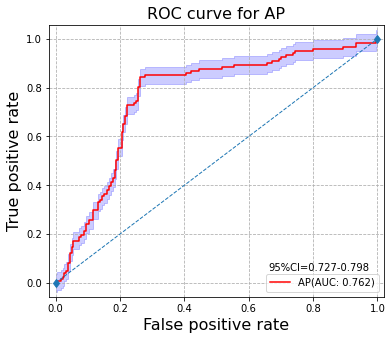

In [39]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

from matplotlib import rcParams
from collections import Counter
#ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
#ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
ap_y_pred = model.predict(lasso_ap_train_data)
#ap_y_pred = model.predict(ap_x_test_data)
#print(ap_y_pred)
ap_y_pred=np.argmax(ap_y_pred,axis=1)
print(ap_y_pred)
y_data_one = ap_y_train_data_copy
ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
print('acc=',ap_acc)
ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
print('precision=',ap_precision)
ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
print('recall=',ap_recall)
ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
print('f1=',ap_f1)
tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
print('auc=',auc0)
plt.figure(figsize=(6,5))
plt.margins(0.02,0.02)
plt.plot(fpr0,tpr0,'red',label="AP(AUC: {:.3f})".format(auc0),linewidth=1.5)
plt.plot([0,1],[0,1],'d--',linewidth=1)
ci = confidence_interval(tpr0)
print(ci)
plt.fill_between(fpr0,tpr0-ci,tpr0+ci,color='blue',alpha=0.2)
plt.text(0.66, 0.05, '95%CI={:.3f}-{:.3f}'.format(auc0-ci,auc0+ci))
plt.xlabel("False positive rate",fontsize=16)
plt.ylabel("True positive rate",fontsize=16)
plt.title("ROC curve for AP",fontsize=16)
plt.legend(loc="lower right",fontsize=10)
plt.grid(linestyle='--')
plt.show()
# save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
# plt.savefig("roc_ap.png",bbox_inches = 'tight',dpi=500)

[0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1
 1]
acc= 0.7333333333333333
precision= 0.75
recall= 0.7105263157894737
f1= 0.7297297297297298
auc= 0.721509971509972
0.07224759075892112


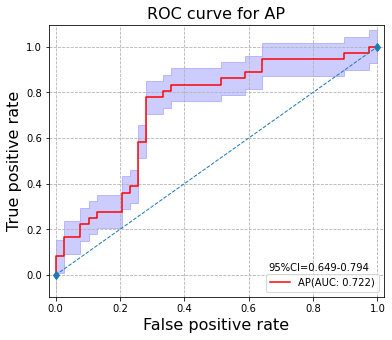

In [175]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

from matplotlib import rcParams
from collections import Counter
#ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
#ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
ap_y_pred = model.predict(lasso_ap_test_data)
#ap_y_pred = model.predict(ap_x_test_data)
#print(ap_y_pred)
ap_y_pred=np.argmax(ap_y_pred,axis=1)
print(ap_y_pred)
y_data_one = ap_y_test_data_copy
ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
print('acc=',ap_acc)
ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
print('precision=',ap_precision)
ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
print('recall=',ap_recall)
ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
print('f1=',ap_f1)
tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
print('auc=',auc0)
plt.figure(figsize=(6,5))
plt.margins(0.02,0.02)
plt.plot(fpr0,tpr0,'red',label="AP(AUC: {:.3f})".format(auc0),linewidth=1.5)
plt.plot([0,1],[0,1],'d--',linewidth=1)
ci = confidence_interval(tpr0)
print(ci)
plt.fill_between(fpr0,tpr0-ci,tpr0+ci,color='blue',alpha=0.2)
plt.text(0.66, 0.02, '95%CI={:.3f}-{:.3f}'.format(auc0-ci,auc0+ci))
plt.xlabel("False positive rate",fontsize=16)
plt.ylabel("True positive rate",fontsize=16)
plt.title("ROC curve for AP",fontsize=16)
plt.legend(loc="lower right",fontsize=10)
plt.grid(linestyle='--')
# plt.show()
# save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
plt.savefig("roc_ap.pdf",bbox_inches = 'tight',dpi=400)

In [49]:
model.save_weights('ap_model.h5')

## VP data

In [176]:
def get_data(vp_train_data,vp_test_data):
    vp_y_train_data = vp_train_data['label']
    vp_y_test_data = vp_test_data['label']
    vp_x_train_data = vp_train_data.drop(['image_ID','label'],axis=1).values
    vp_x_test_data = vp_test_data.drop(['image_ID','label'],axis=1).values
    list_num=lasso_feature2(vp_train_data.drop(['image_ID','label'],axis=1), vp_y_train_data)
    lasso_vp_train_df = vp_train_data.drop(['image_ID','label'],axis=1).iloc[:,list_num]
    lasso_vp_test_df = vp_test_data.drop(['image_ID','label'],axis=1).iloc[:,list_num]
    lasso_vp_train_data = lasso_vp_train_df.values
    lasso_vp_test_data = lasso_vp_test_df.values
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler().fit(lasso_vp_train_data)
    lasso_ap_train_data = scaler.transform(lasso_vp_train_data)
    lasso_ap_test_data=scaler.transform(lasso_vp_test_data)
    num_classes = 2
    vp_y_test_data_copy = vp_y_test_data
    vp_y_train_data_copy = vp_y_train_data
    vp_y_train_data = keras.utils.to_categorical(vp_y_train_data, num_classes)
    vp_y_test_data = keras.utils.to_categorical(vp_y_test_data, num_classes)
    return lasso_vp_train_data,lasso_vp_test_data,vp_y_train_data,vp_y_test_data,vp_y_test_data_copy,vp_y_train_data_copy

In [177]:
vp_train_data = pd.read_csv('vp_train.csv')
vp_test_data = pd.read_csv('vp_test.csv')

In [178]:
vp_pvalues_train = p_value2(vp_train_data.drop(['image_ID','label'],axis=1).values)
print(vp_pvalues_train)

vp_pvalues_test = p_value2(vp_test_data.drop(['image_ID','label'],axis=1).values)
print(vp_pvalues_test)

0.0045087938241995945
0.006885692853012981


In [179]:
vp_train_data

,VP_original_shape_Elongation,VP_original_shape_Flatness,VP_original_shape_LeastAxisLength,VP_original_shape_MajorAxisLength,VP_original_shape_Maximum2DDiameterColumn,VP_original_shape_Maximum2DDiameterRow,VP_original_shape_Maximum2DDiameterSlice,VP_original_shape_Maximum3DDiameter,VP_original_shape_MeshVolume,VP_original_shape_MinorAxisLength,...,VP_wavelet-LLL_glszm_ZoneEntropy,VP_wavelet-LLL_glszm_ZonePercentage,VP_wavelet-LLL_glszm_ZoneVariance,VP_wavelet-LLL_ngtdm_Busyness,VP_wavelet-LLL_ngtdm_Coarseness,VP_wavelet-LLL_ngtdm_Complexity,VP_wavelet-LLL_ngtdm_Contrast,VP_wavelet-LLL_ngtdm_Strength,image_ID,label
0,0.768077,0.709230,19.261764,27.158689,30.413813,30.886890,31.016125,32.341923,6931.333333,20.859952,...,6.699791,0.032156,27763.615350,0.731378,0.002220,185.792928,0.020325,1.052688,1001274,1
1,0.945284,0.671918,49.820952,74.147367,93.348808,87.045965,85.445889,94.831429,165508.458300,70.090299,...,8.631866,0.260881,11535.588190,0.179285,0.000202,54204.259290,0.136175,8.770643,1003460,1
2,0.865779,0.745988,18.344511,24.590886,26.476405,28.844410,26.570661,29.715316,6377.125000,21.290275,...,7.485477,0.196005,3851.488022,0.116785,0.001740,20069.861370,0.631691,58.298070,1012738,1
3,0.981197,0.781687,60.104993,76.891364,89.899944,89.403579,92.135769,95.063137,249543.583300,75.445570,...,8.762842,0.101941,237516.170100,0.457127,0.000069,15236.814660,0.042537,3.940154,1033001,0
4,0.949862,0.810611,17.295305,21.336144,24.083189,27.018512,25.298221,27.676705,4591.583333,20.266389,...,5.756976,0.019481,29959.800000,1.906884,0.003091,47.672895,0.016304,0.299096,1039069,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.864208,0.731704,20.859806,28.557953,35.885652,29.952111,32.262009,37.728130,10147.833594,24.917483,...,6.569319,0.037189,74966.902016,10.341517,0.001237,1379.277968,0.015483,5.471807,1227528,1
297,0.833625,0.665237,40.212491,60.489309,79.331112,66.536112,71.723139,80.263847,73498.801991,50.205358,...,7.916582,0.087427,524886.364965,1.244917,0.000229,11011.863905,0.013672,4.673209,3171372,1
298,0.802895,0.709468,30.046108,42.748666,48.937710,48.216267,43.646574,50.934833,32478.446264,34.512242,...,7.321580,0.070859,106100.434152,2.705277,0.000728,9750.815176,0.015340,11.244709,2075572,1
299,0.835217,0.588804,32.427008,54.746412,69.362323,56.605353,64.361632,70.021110,51974.477882,45.792323,...,8.199277,0.213629,314745.822364,0.750082,0.000501,32656.293385,0.046884,9.816645,3396332,1


In [180]:
lasso_vp_train_data,lasso_vp_test_data,vp_y_train_data,vp_y_test_data,vp_y_test_data_copy,vp_y_train_data_copy= get_data(vp_train_data,vp_test_data)
print(lasso_vp_train_data.shape)
print(lasso_vp_test_data.shape)
print(vp_y_train_data.shape)
print(vp_y_test_data.shape)

Number of features used: 195
195
(301, 195)
(75, 195)
(301, 2)
(75, 2)


/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.972863724470656, tolerance: 0.007524916943521601
  positive)


In [181]:
## VP model
input3 = Input(shape=(195,))
x3 = Dense(150)(input3)
x3 = BatchNormalization()(x3)
x3 = Activation(keras.layers.ELU())(x3)
x3 = Dropout(0.2)(x3)
x3 = Dense(150)(x3)
x3 = BatchNormalization()(x3)
x3 = Activation(keras.layers.ELU())(x3)
x3 = Dropout(0.4)(x3)
x3 = Dense(150)(x3)
x3 = BatchNormalization()(x3)
x3 = Activation(keras.layers.ELU())(x3)
x3 = Dropout(0.4)(x3)
x3 = Dense(100)(x3)
x3 = BatchNormalization()(x3)
x3 = Activation(keras.layers.ELU())(x3)
x3 = Dropout(0.5)(x3)
x3 = Dense(100)(x3)
x2 = BatchNormalization()(x3)
x3 = Activation(keras.layers.ELU())(x3)
x3 = Dropout(0.5)(x3)
preds = Dense(num_classes, activation='softmax')(x3) #no initialization in output layer
model = Model(input3, preds)
#model.compile(optimizer='adam', loss=categorical_focal_loss(gamma=1.25, alpha=0.25), metrics=['accuracy'])
model.compile(optimizer='nadam', loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as ELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 195)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 150)               29400     
_________________________________________________________________
batch_normalization_91 (Batc (None, 150)               600       
_________________________________________________________________
activation_91 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 150)               22650     
_________________________________________________________________
batch_normalization_92 (Batc (None, 150)               600       
__________

In [182]:
model.load_weights('vp_model.h5')

In [116]:
model.fit(x=lasso_vp_train_data, y=vp_y_train_data, shuffle=True, epochs=500,
                  batch_size=64,validation_data=(lasso_vp_test_data,vp_y_test_data),class_weight='auto')

Train on 301 samples, validate on 75 samples
Epoch 1/500
301/301 [==============================] - 4s 13ms/step - loss: 0.9901 - acc: 0.5781 - val_loss: 0.7181 - val_acc: 0.4800
Epoch 2/500
301/301 [==============================] - 0s 164us/step - loss: 1.0692 - acc: 0.4884 - val_loss: 0.7021 - val_acc: 0.4800
Epoch 3/500
301/301 [==============================] - 0s 209us/step - loss: 1.0032 - acc: 0.5150 - val_loss: 0.6904 - val_acc: 0.5600
Epoch 4/500
301/301 [==============================] - 0s 141us/step - loss: 0.9639 - acc: 0.4718 - val_loss: 0.6959 - val_acc: 0.5600
Epoch 5/500
301/301 [==============================] - 0s 149us/step - loss: 0.9040 - acc: 0.5183 - val_loss: 0.6802 - val_acc: 0.5600
Epoch 6/500
301/301 [==============================] - 0s 132us/step - loss: 0.8174 - acc: 0.5581 - val_loss: 0.6821 - val_acc: 0.5467
Epoch 7/500
301/301 [==============================] - 0s 166us/step - loss: 0.9466 - acc: 0.4917 - val_loss: 0.6840 - val_acc: 0.6000
Epoch 8/500

Epoch 61/500
301/301 [==============================] - 0s 170us/step - loss: 0.6775 - acc: 0.5482 - val_loss: 0.6785 - val_acc: 0.5733
Epoch 62/500
301/301 [==============================] - 0s 141us/step - loss: 0.6777 - acc: 0.5249 - val_loss: 0.6789 - val_acc: 0.5733
Epoch 63/500
301/301 [==============================] - 0s 131us/step - loss: 0.6946 - acc: 0.5249 - val_loss: 0.6795 - val_acc: 0.6000
Epoch 64/500
301/301 [==============================] - 0s 137us/step - loss: 0.6816 - acc: 0.6047 - val_loss: 0.6792 - val_acc: 0.6133
Epoch 65/500
301/301 [==============================] - 0s 125us/step - loss: 0.6972 - acc: 0.5482 - val_loss: 0.6792 - val_acc: 0.5867
Epoch 66/500
301/301 [==============================] - 0s 141us/step - loss: 0.6976 - acc: 0.5017 - val_loss: 0.6811 - val_acc: 0.5733
Epoch 67/500
301/301 [==============================] - 0s 137us/step - loss: 0.7049 - acc: 0.5382 - val_loss: 0.6827 - val_acc: 0.6000
Epoch 68/500
301/301 [==========================

301/301 [==============================] - 0s 131us/step - loss: 0.6894 - acc: 0.5382 - val_loss: 0.6798 - val_acc: 0.5600
Epoch 122/500
301/301 [==============================] - 0s 147us/step - loss: 0.6798 - acc: 0.5648 - val_loss: 0.6810 - val_acc: 0.6400
Epoch 123/500
301/301 [==============================] - 0s 145us/step - loss: 0.6772 - acc: 0.5615 - val_loss: 0.6823 - val_acc: 0.6267
Epoch 124/500
301/301 [==============================] - 0s 128us/step - loss: 0.6738 - acc: 0.5914 - val_loss: 0.6833 - val_acc: 0.6133
Epoch 125/500
301/301 [==============================] - 0s 135us/step - loss: 0.6829 - acc: 0.5482 - val_loss: 0.6834 - val_acc: 0.6000
Epoch 126/500
301/301 [==============================] - 0s 147us/step - loss: 0.6711 - acc: 0.5216 - val_loss: 0.6858 - val_acc: 0.6000
Epoch 127/500
301/301 [==============================] - 0s 130us/step - loss: 0.6924 - acc: 0.5615 - val_loss: 0.6856 - val_acc: 0.6267
Epoch 128/500
301/301 [==============================] 

Epoch 181/500
301/301 [==============================] - 0s 126us/step - loss: 0.6611 - acc: 0.5781 - val_loss: 0.6924 - val_acc: 0.5467
Epoch 182/500
301/301 [==============================] - 0s 131us/step - loss: 0.6772 - acc: 0.5648 - val_loss: 0.6923 - val_acc: 0.5600
Epoch 183/500
301/301 [==============================] - 0s 139us/step - loss: 0.6777 - acc: 0.5748 - val_loss: 0.6909 - val_acc: 0.5467
Epoch 184/500
301/301 [==============================] - 0s 130us/step - loss: 0.6665 - acc: 0.5914 - val_loss: 0.6930 - val_acc: 0.5467
Epoch 185/500
301/301 [==============================] - 0s 141us/step - loss: 0.6755 - acc: 0.5880 - val_loss: 0.6970 - val_acc: 0.5333
Epoch 186/500
301/301 [==============================] - 0s 132us/step - loss: 0.6888 - acc: 0.5681 - val_loss: 0.6923 - val_acc: 0.5867
Epoch 187/500
301/301 [==============================] - 0s 131us/step - loss: 0.6761 - acc: 0.5581 - val_loss: 0.6931 - val_acc: 0.6000
Epoch 188/500
301/301 [==================

Epoch 241/500
301/301 [==============================] - 0s 134us/step - loss: 0.6611 - acc: 0.5980 - val_loss: 0.6895 - val_acc: 0.5467
Epoch 242/500
301/301 [==============================] - 0s 140us/step - loss: 0.6732 - acc: 0.5581 - val_loss: 0.6901 - val_acc: 0.5467
Epoch 243/500
301/301 [==============================] - 0s 122us/step - loss: 0.6745 - acc: 0.5847 - val_loss: 0.6905 - val_acc: 0.5333
Epoch 244/500
301/301 [==============================] - 0s 139us/step - loss: 0.6503 - acc: 0.5914 - val_loss: 0.6907 - val_acc: 0.5467
Epoch 245/500
301/301 [==============================] - 0s 138us/step - loss: 0.6493 - acc: 0.5847 - val_loss: 0.6917 - val_acc: 0.5333
Epoch 246/500
301/301 [==============================] - 0s 121us/step - loss: 0.6479 - acc: 0.5814 - val_loss: 0.6926 - val_acc: 0.5333
Epoch 247/500
301/301 [==============================] - 0s 137us/step - loss: 0.6509 - acc: 0.6113 - val_loss: 0.6940 - val_acc: 0.5600
Epoch 248/500
301/301 [==================

Epoch 301/500
301/301 [==============================] - 0s 148us/step - loss: 0.6635 - acc: 0.5714 - val_loss: 0.7156 - val_acc: 0.5600
Epoch 302/500
301/301 [==============================] - 0s 131us/step - loss: 0.6524 - acc: 0.6047 - val_loss: 0.6948 - val_acc: 0.5600
Epoch 303/500
301/301 [==============================] - 0s 139us/step - loss: 0.6354 - acc: 0.6080 - val_loss: 0.6936 - val_acc: 0.5600
Epoch 304/500
301/301 [==============================] - 0s 129us/step - loss: 0.6543 - acc: 0.6047 - val_loss: 0.6917 - val_acc: 0.5467
Epoch 305/500
301/301 [==============================] - 0s 141us/step - loss: 0.6393 - acc: 0.6080 - val_loss: 0.6874 - val_acc: 0.5333
Epoch 306/500
301/301 [==============================] - 0s 137us/step - loss: 0.6482 - acc: 0.6113 - val_loss: 0.6932 - val_acc: 0.4667
Epoch 307/500
301/301 [==============================] - 0s 134us/step - loss: 0.6482 - acc: 0.5880 - val_loss: 0.6862 - val_acc: 0.5200
Epoch 308/500
301/301 [==================

Epoch 361/500
301/301 [==============================] - 0s 191us/step - loss: 0.6517 - acc: 0.5415 - val_loss: 0.6835 - val_acc: 0.6000
Epoch 362/500
301/301 [==============================] - 0s 157us/step - loss: 0.6413 - acc: 0.6246 - val_loss: 0.6908 - val_acc: 0.5467
Epoch 363/500
301/301 [==============================] - 0s 149us/step - loss: 0.6609 - acc: 0.5980 - val_loss: 0.6873 - val_acc: 0.5600
Epoch 364/500
301/301 [==============================] - 0s 145us/step - loss: 0.6614 - acc: 0.5714 - val_loss: 0.6862 - val_acc: 0.5600
Epoch 365/500
301/301 [==============================] - 0s 142us/step - loss: 0.6399 - acc: 0.6113 - val_loss: 0.6890 - val_acc: 0.5467
Epoch 366/500
301/301 [==============================] - 0s 126us/step - loss: 0.6351 - acc: 0.6146 - val_loss: 0.6863 - val_acc: 0.5867
Epoch 367/500
301/301 [==============================] - 0s 138us/step - loss: 0.6410 - acc: 0.6080 - val_loss: 0.6842 - val_acc: 0.5867
Epoch 368/500
301/301 [==================

Epoch 421/500
301/301 [==============================] - 0s 151us/step - loss: 0.6092 - acc: 0.5880 - val_loss: 0.7270 - val_acc: 0.5733
Epoch 422/500
301/301 [==============================] - 0s 134us/step - loss: 0.6200 - acc: 0.6312 - val_loss: 0.6845 - val_acc: 0.6000
Epoch 423/500
301/301 [==============================] - 0s 151us/step - loss: 0.6157 - acc: 0.6246 - val_loss: 0.6799 - val_acc: 0.6000
Epoch 424/500
301/301 [==============================] - 0s 143us/step - loss: 0.6284 - acc: 0.5781 - val_loss: 0.6869 - val_acc: 0.5867
Epoch 425/500
301/301 [==============================] - 0s 147us/step - loss: 0.6275 - acc: 0.6213 - val_loss: 0.6834 - val_acc: 0.5733
Epoch 426/500
301/301 [==============================] - 0s 165us/step - loss: 0.6313 - acc: 0.5748 - val_loss: 0.6911 - val_acc: 0.5200
Epoch 427/500
301/301 [==============================] - 0s 138us/step - loss: 0.6492 - acc: 0.5814 - val_loss: 0.6930 - val_acc: 0.5333
Epoch 428/500
301/301 [==================

Epoch 481/500
301/301 [==============================] - 0s 152us/step - loss: 0.6328 - acc: 0.6146 - val_loss: 0.6792 - val_acc: 0.5733
Epoch 482/500
301/301 [==============================] - 0s 138us/step - loss: 0.6280 - acc: 0.5980 - val_loss: 0.6797 - val_acc: 0.5733
Epoch 483/500
301/301 [==============================] - 0s 145us/step - loss: 0.6305 - acc: 0.5681 - val_loss: 0.6753 - val_acc: 0.5867
Epoch 484/500
301/301 [==============================] - 0s 121us/step - loss: 0.6212 - acc: 0.6146 - val_loss: 0.6790 - val_acc: 0.5867
Epoch 485/500
301/301 [==============================] - 0s 139us/step - loss: 0.6239 - acc: 0.5980 - val_loss: 0.6786 - val_acc: 0.5867
Epoch 486/500
301/301 [==============================] - 0s 139us/step - loss: 0.6239 - acc: 0.5980 - val_loss: 0.6993 - val_acc: 0.5867
Epoch 487/500
301/301 [==============================] - 0s 135us/step - loss: 0.6480 - acc: 0.6013 - val_loss: 0.6923 - val_acc: 0.5867
Epoch 488/500
301/301 [==================

In [183]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

from matplotlib import rcParams
from collections import Counter
def eval_model(lasso_ap_test_data,ap_y_test_data_copy):
    #ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
    #ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
    ap_y_pred = model.predict(lasso_ap_test_data)
    #ap_y_pred = model.predict(ap_x_test_data)
    #print(ap_y_pred)
    ap_y_pred=np.argmax(ap_y_pred,axis=1)
    print(ap_y_pred)
    y_data_one = ap_y_test_data_copy
    ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
    print('acc=',ap_acc)
    ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
    print('precision=',ap_precision)
    ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
    print('recall=',ap_recall)
    ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
    print('f1=',ap_f1)
    tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
    print('auc=',auc0)
    plt.figure(figsize=(6,5))
    plt.margins(0.02,0.02)
    plt.plot(fpr0,tpr0,'red',label="VP(AUC: {:.3f})".format(auc0),linewidth=1.5)
    plt.plot([0,1],[0,1],'d--',linewidth=1)
    ci = confidence_interval(tpr0)
    print(ci)
    plt.fill_between(fpr0,tpr0-ci,tpr0+ci,color='blue',alpha=0.2)
    plt.text(0.66, 0.04, '95%CI={:.3f}-{:.3f}'.format(auc0-ci,auc0+ci))
    plt.xlabel("False positive rate",fontsize=16)
    plt.ylabel("True positive rate",fontsize=16)
    plt.title("ROC curve for VP",fontsize=16)
    plt.legend(loc="lower right",fontsize=10)
    plt.grid(linestyle='--')
#     plt.show()
    # save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
    plt.savefig("roc_vp.pdf",bbox_inches = 'tight',dpi=500)

[1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1
 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 1 0 1]
acc= 0.6112956810631229
precision= 0.5789473684210527
recall= 0.8066666666666666
f1= 0.6740947075208913
auc= 0.6237778240066594
0.03405313380165666


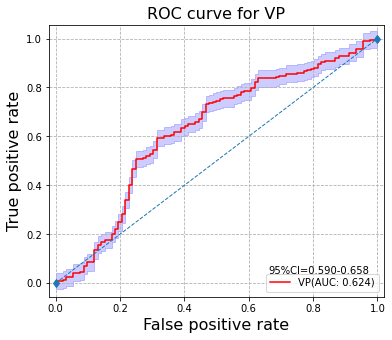

In [55]:
eval_model(lasso_vp_train_data,vp_y_train_data_copy)

[1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1]
acc= 0.6133333333333333
precision= 0.576271186440678
recall= 0.8947368421052632
f1= 0.7010309278350517
auc= 0.6355932203389828
0.06663355585920111


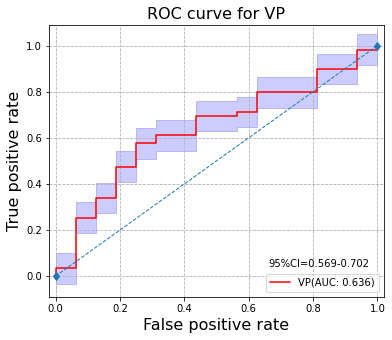

In [184]:
eval_model(lasso_vp_test_data,vp_y_test_data_copy)

In [121]:
model.save_weights('vp_model.h5')

## AP+VP

In [185]:
ap_vp_train_data = pd.read_csv('ap_vp_train.csv')
ap_vp_test_data = pd.read_csv('ap_vp_test.csv')

In [186]:
ap_vp_pvalues_train = p_value2(ap_vp_train_data.drop(['image_ID','label'],axis=1).values)
print(ap_vp_pvalues_train)

ap_vp_pvalues_test = p_value2(ap_vp_test_data.drop(['image_ID','label'],axis=1).values)
print(ap_vp_pvalues_test)

0.0036931933717822486
0.006409996833170458


In [187]:
def get_data_ap_vp(vp_train_data,vp_test_data):
    vp_y_train_data = vp_train_data['label']
    vp_y_test_data = vp_test_data['label']
    vp_x_train_data = vp_train_data.drop(['image_ID','label'],axis=1).values
    vp_x_test_data = vp_test_data.drop(['image_ID','label'],axis=1).values
    ap_x_train_data_ti = vp_x_train_data[:,0:1688]
    vp_x_train_data_ti = vp_x_train_data[:,1688:]
    ap_x_test_data_ti = vp_x_test_data[:,0:1688]
    vp_x_test_data_ti = vp_x_test_data[:,1688:]
    
    list_num=lasso_feature(ap_x_train_data_ti, vp_y_train_data)
    lasso_ap_train_data_ti = ap_x_train_data_ti[:,list_num]
    lasso_ap_test_data_ti = ap_x_test_data_ti[:,list_num]
    list_num2=lasso_feature2(vp_x_train_data_ti, vp_y_train_data)
    lasso_vp_train_data_ti = vp_x_train_data_ti[:,list_num2]
    lasso_vp_test_data_ti = vp_x_test_data_ti[:,list_num2]
    lasso_vp_train_data = np.concatenate((lasso_ap_train_data_ti,lasso_vp_train_data_ti),axis=1)
    lasso_vp_test_data = np.concatenate((lasso_ap_test_data_ti,lasso_vp_test_data_ti),axis=1)
    from sklearn import preprocessing
    scaler = preprocessing.MinMaxScaler().fit(lasso_vp_train_data)
    lasso_ap_train_data = scaler.transform(lasso_vp_train_data)
    lasso_ap_test_data=scaler.transform(lasso_vp_test_data)
    num_classes = 2
    vp_y_test_data_copy = vp_y_test_data
    vp_y_train_data_copy = vp_y_train_data
    vp_y_train_data = keras.utils.to_categorical(vp_y_train_data, num_classes)
    vp_y_test_data = keras.utils.to_categorical(vp_y_test_data, num_classes)
    print(lasso_vp_train_data.shape)
    print(lasso_vp_test_data.shape)
    print(vp_y_train_data.shape)
    print(vp_y_test_data.shape)
    return lasso_vp_train_data,lasso_vp_test_data,vp_y_train_data,vp_y_test_data,vp_y_test_data_copy,vp_y_train_data_copy
    

In [188]:
lasso_ap_vp_train_data,lasso_ap_vp_test_data,ap_vp_y_train_data,ap_vp_y_test_data,ap_vp_y_test_data_copy,ap_vp_y_train_data_copy=get_data_ap_vp(ap_vp_train_data,ap_vp_test_data)




/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.574708457783272, tolerance: 0.007524916943521601
  positive)


Number of features used: 176
176
Number of features used: 195
195
(301, 371)
(75, 371)
(301, 2)
(75, 2)


/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.972863724470656, tolerance: 0.007524916943521601
  positive)


In [189]:
ap_x_train_data_ti = lasso_ap_vp_train_data[:,0:176]
vp_x_train_data_ti = lasso_ap_vp_train_data[:,176:]
ap_x_test_data_ti = lasso_ap_vp_test_data[:,0:176]
vp_x_test_data_ti = lasso_ap_vp_test_data[:,176:]
print(ap_x_train_data_ti.shape)
print(vp_x_train_data_ti.shape)
print(ap_x_test_data_ti.shape)
print(vp_x_test_data_ti.shape)

(301, 176)
(301, 195)
(75, 176)
(75, 195)


In [190]:
input2 = Input(shape=(176,))
input3 = Input(shape=(195,))
# model 2--AP
x2 = Dense(80)(input2)
x2 = BatchNormalization()(x2)
x2 = Activation(keras.layers.ELU())(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(40)(x2)
x2 = BatchNormalization()(x2)
x2 = Activation(keras.layers.ELU())(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(20)(x2)
x2 = BatchNormalization()(x2)
x2 = Activation(keras.layers.ELU())(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(20)(x2)
x2 = BatchNormalization()(x2)
x2 = Activation(keras.layers.ELU())(x2)
x2 = Dropout(0.5)(x2)

# model 3--VP
x3 = Dense(40)(input3)
x3 = BatchNormalization()(x3)
x3 = Activation(keras.layers.ELU())(x3)
x3 = Dropout(0.2)(x3)
x3 = Dense(20)(x3)
x3 = BatchNormalization()(x3)
x3 = Activation(keras.layers.ELU())(x3)
x3 = Dropout(0.4)(x3)
# x3 = Dense(150)(x3)
# x3 = BatchNormalization()(x3)
# x3 = Activation(keras.layers.ELU())(x3)
# #x3 = Dropout(0.4)(x3)
# x3 = Dense(100)(x3)
# x3 = BatchNormalization()(x3)
# x3 = Activation(keras.layers.ELU())(x3)
# #x3 = Dropout(0.5)(x3)
# x3 = Dense(20)(x3)
# x2 = BatchNormalization()(x3)
# x3 = Activation(keras.layers.ELU())(x3)
#x3 = Dropout(0.5)(x3)

x = keras.layers.Concatenate(axis=1)([x2, x3])
#     x_r = keras.layers.Reshape((3,8))(x)
#     # attention model
#     attention = Dense(1, activation='tanh')(x_r)
#     print(attention)
#     attention = Flatten()(attention)
#     attention = Activation('softmax')(attention)
#     attention = RepeatVector(8)(attention)
#     attention = Permute([2, 1], name='attention_vec')(attention)
#     attention_mul = keras.layers.Multiply()([x_r, attention])
#     x = Flatten()(attention_mul)
x = Dense(10)(x)
x = BatchNormalization()(x)
x = Activation(keras.layers.ELU())(x)
x = Dropout(0.5)(x)
preds = Dense(num_classes, activation='softmax')(x) #no initialization in output layer


model = Model([input2,input3], preds)
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as ELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           (None, 176)          0                                            
__________________________________________________________________________________________________
dense_112 (Dense)               (None, 80)           14160       input_27[0][0]                   
__________________________________________________________________________________________________
batch_normalization_96 (BatchNo (None, 80)           320         dense_112[0][0]                  
__________________________________________________________________________________________________
activation_96 (Activation)      (None, 80)           0           batch_normalization_96[0][0]     
__________________________________________________________________________________________________
dropout_68

In [986]:
model.fit(x=[ap_x_train_data_ti,vp_x_train_data_ti], y=ap_vp_y_train_data, epochs=1,shuffle=True,batch_size=31
          ,validation_data=([ap_x_test_data_ti,vp_x_test_data_ti],ap_vp_y_test_data),class_weight='auto')

Train on 301 samples, validate on 75 samples
Epoch 1/1
301/301 [==============================] - 0s 837us/step - loss: 0.6536 - acc: 0.6645 - val_loss: 0.6110 - val_acc: 0.7200


In [191]:
model.load_weights('ap_vp.h5')

In [192]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

from matplotlib import rcParams
from collections import Counter
def eval_model_two(lasso_ap_test_data,lasso_ap_test_data2,ap_y_test_data_copy):
    #ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
    #ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
    ap_y_pred = model.predict([lasso_ap_test_data,lasso_ap_test_data2])
    #ap_y_pred = model.predict(ap_x_test_data)
    #print(ap_y_pred)
    ap_y_pred=np.argmax(ap_y_pred,axis=1)
    print(ap_y_pred)
    y_data_one = ap_y_test_data_copy
    ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
    print('acc=',ap_acc)
    ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
    print('precision=',ap_precision)
    ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
    print('recall=',ap_recall)
    ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
    print('f1=',ap_f1)
    tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
    print('auc=',auc0)
    plt.figure(figsize=(6,5))
    plt.margins(0.02,0.02)
    plt.plot(fpr0,tpr0,'red',label="AP+VP(AUC: {:.3f})".format(auc0),linewidth=1.5)
    plt.plot([0,1],[0,1],'d--',linewidth=1)
    ci = confidence_interval(tpr0)
    print(ci)
    plt.fill_between(fpr0,tpr0-ci,tpr0+ci,color='blue',alpha=0.2)
    plt.text(0.66, 0.02, '95%CI={:.3f}-{:.3f}'.format(auc0-ci,auc0+ci))
    plt.xlabel("False positive rate",fontsize=16)
    plt.ylabel("True positive rate",fontsize=16)
    plt.title("ROC curve for AP and VP",fontsize=16)
    plt.legend(loc="lower right",fontsize=10)
    plt.grid(linestyle='--')
#     plt.show()
    # save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
    plt.savefig("roc_ap_vp.pdf",bbox_inches = 'tight',dpi=500)

[1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0
 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1
 1 0 1 0 0]
acc= 0.6943521594684385
precision= 0.7543859649122807
recall= 0.5733333333333334
f1= 0.6515151515151515
auc= 0.6591612721643675
0.03491907638359781


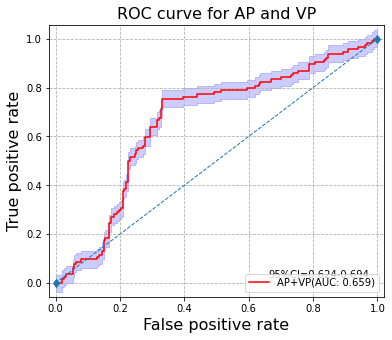

In [74]:
eval_model_two(ap_x_train_data_ti,vp_x_train_data_ti,ap_vp_y_train_data_copy)

[0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1
 1]
acc= 0.72
precision= 0.7575757575757576
recall= 0.6578947368421053
f1= 0.704225352112676
auc= 0.7099567099567096
0.07362525742643111


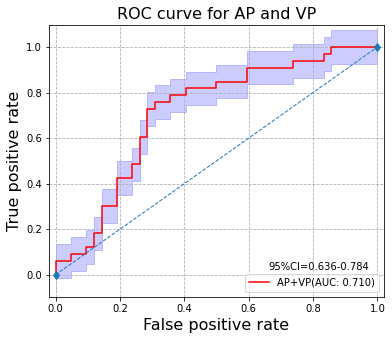

In [193]:
eval_model_two(ap_x_test_data_ti,vp_x_test_data_ti,ap_vp_y_test_data_copy)

In [989]:
model.save_weights('ap_vp.h5')

## 临床

In [194]:
clinical_train_data = pd.read_csv('clinical_train.csv')
clinical_test_data = pd.read_csv('clinical_test.csv')

In [195]:
c_pvalues_train = p_value2(clinical_train_data.drop(['image_ID','是否早发'],axis=1).values)
# ,clinical_train_data['是否早发'])
print(c_pvalues_train)

c_pvalues_test = p_value2(clinical_test_data.drop(['image_ID','是否早发'],axis=1).values)
# ,clinical_test_data['是否早发'])
print(c_pvalues_test)

0.007549586149923811
0.009769794259176241


In [196]:
c_y_train_data = clinical_train_data['是否早发']
c_y_test_data = clinical_test_data['是否早发']
c_x_train_data = clinical_train_data.drop(['image_ID','是否早发'],axis=1).values
c_x_test_data = clinical_test_data.drop(['image_ID','是否早发'],axis=1).values
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(c_x_train_data)
std_c_train_data = scaler.transform(c_x_train_data)
std_c_test_data=scaler.transform(c_x_test_data)
num_classes = 2
c_y_test_data_copy = c_y_test_data
c_y_train_data_copy = c_y_train_data
c_y_train_data = keras.utils.to_categorical(c_y_train_data, num_classes)
c_y_test_data = keras.utils.to_categorical(c_y_test_data, num_classes)

In [197]:
std_c_train_data.shape

(301, 34)

In [198]:
input1 = Input(shape=(34,))
x1 = Dense(20)(input1)
x1 = BatchNormalization()(x1)
x1 = Activation(keras.layers.ELU())(x1)
#x1 = Dropout(0.2)(x1)
x1 = Dense(20)(x1)
x1 = BatchNormalization()(x1)
x1 = Activation(keras.layers.ELU())(x1)
#x1 = Dropout(0.2)(x1)
x1 = Dense(20)(input1)
x1 = BatchNormalization()(x1)
x1 = Activation(keras.layers.ELU())(x1)
preds = Dense(num_classes, activation='softmax')(x1) #no initialization in output layer
model = Model(input1, preds)
#model.compile(optimizer='adam', loss=categorical_focal_loss(gamma=1.25, alpha=0.25), metrics=['accuracy'])
model.compile(optimizer='nadam', loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as ELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 34)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 20)                700       
_________________________________________________________________
batch_normalization_105 (Bat (None, 20)                80        
_________________________________________________________________
activation_105 (Activation)  (None, 20)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 2)                 42        
Total params: 822
Trainable params: 782
Non-trainable params: 40
_________________________________________________________________


In [277]:
model.fit(x=std_c_train_data, y=c_y_train_data, shuffle=True, epochs=50,
                  batch_size=31,validation_data=(std_c_test_data,c_y_test_data),class_weight='auto')

Train on 301 samples, validate on 75 samples
Epoch 1/50
301/301 [==============================] - 8s 25ms/step - loss: 0.9816 - acc: 0.4751 - val_loss: 0.9246 - val_acc: 0.5067
Epoch 2/50
301/301 [==============================] - 0s 255us/step - loss: 0.8550 - acc: 0.5050 - val_loss: 0.8198 - val_acc: 0.5067
Epoch 3/50
301/301 [==============================] - 0s 301us/step - loss: 0.7969 - acc: 0.5183 - val_loss: 0.7363 - val_acc: 0.5867
Epoch 4/50
301/301 [==============================] - 0s 271us/step - loss: 0.7374 - acc: 0.5249 - val_loss: 0.6736 - val_acc: 0.6400
Epoch 5/50
301/301 [==============================] - 0s 256us/step - loss: 0.7058 - acc: 0.5681 - val_loss: 0.6309 - val_acc: 0.6933
Epoch 6/50
301/301 [==============================] - 0s 259us/step - loss: 0.6676 - acc: 0.6279 - val_loss: 0.6039 - val_acc: 0.7200
Epoch 7/50
301/301 [==============================] - 0s 269us/step - loss: 0.6551 - acc: 0.6445 - val_loss: 0.5847 - val_acc: 0.7200
Epoch 8/50
301/301

In [199]:
model.load_weights('clinical.h5')

In [201]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

from matplotlib import rcParams
from collections import Counter
def eval_model_c(lasso_ap_test_data,ap_y_test_data_copy):
    #ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
    #ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
    ap_y_pred = model.predict(lasso_ap_test_data)
    #ap_y_pred = model.predict(ap_x_test_data)
    #print(ap_y_pred)
    ap_y_pred=np.argmax(ap_y_pred,axis=1)
    print(ap_y_pred)
    y_data_one = ap_y_test_data_copy
    ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
    print('acc=',ap_acc)
    ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
    print('precision=',ap_precision)
    ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
    print('recall=',ap_recall)
    ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
    print('f1=',ap_f1)
    tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
    print('auc=',auc0)
    plt.figure(figsize=(6,5))
    plt.margins(0.02,0.02)
    plt.plot(fpr0,tpr0,'red',label="Clinical(AUC: {:.3f})".format(auc0),linewidth=1.5)
    plt.plot([0,1],[0,1],'d--',linewidth=1)
    ci = confidence_interval(tpr0)
    print(ci)
    plt.fill_between(fpr0,tpr0-ci,tpr0+ci,color='blue',alpha=0.2)
    plt.text(0.66, 0.02, '95%CI={:.3f}-{:.3f}'.format(auc0-ci,auc0+ci))
    plt.xlabel("False positive rate",fontsize=16)
    plt.ylabel("True positive rate",fontsize=16)
    plt.title("ROC curve for clinical",fontsize=16)
    plt.legend(loc="lower right",fontsize=10)
    plt.grid(linestyle='--')
#     plt.show()
    # save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
    plt.savefig("roc_clinical.pdf",bbox_inches = 'tight',dpi=500)

[0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
acc= 0.7733333333333333
precision= 0.7333333333333333
recall= 0.868421052631579
f1= 0.7951807228915663
auc= 0.7792592592592594
0.07650295356268869


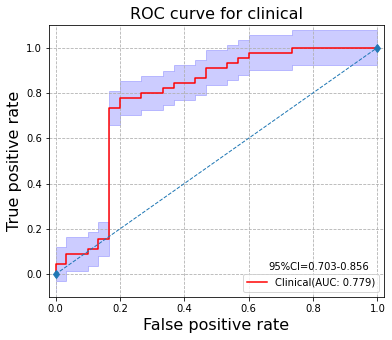

In [202]:
eval_model_c(std_c_test_data,c_y_test_data_copy)

[1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0
 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0
 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1
 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1]
acc= 0.8006644518272426
precision= 0.8040540540540541
recall= 0.7933333333333333
f1= 0.7986577181208053
auc= 0.7902314078784671
0.034569209364451015


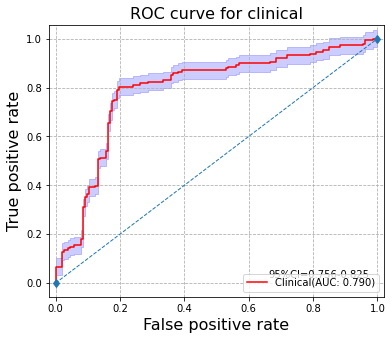

In [84]:
eval_model_c(std_c_train_data,c_y_train_data_copy)

In [280]:
model.save_weights('clinical.h5')

## 临床_AP

In [203]:
clinical_AP_train_data = pd.read_csv('ap_clinical_train.csv')
clinical_AP_test_data = pd.read_csv('ap_clinical_test.csv')

In [204]:
c_ap_pvalues_train = p_value2(clinical_AP_train_data.drop(['image_ID','label'],axis=1).values)
# ,clinical_train_data['是否早发'])
print(c_ap_pvalues_train)

c_ap_pvalues_test = p_value2(clinical_AP_test_data.drop(['image_ID','label'],axis=1).values)
# ,clinical_test_data['是否早发'])
print(c_ap_pvalues_test)

0.0029698390110251827
0.006010030649076393


In [205]:
clinical_AP_train_data.iloc[:,0:34]

,image_ID,性别,Ageff,多发或单发病灶,病变直径（mm）,形态及边界,有无门脉癌栓,病变是否有包膜,肝硬化,肿大淋巴结,...,位置_4,位置_5,位置_6,强化方式_0,强化方式_1,强化方式_2,强化方式_3,强化方式_4,乙肝or丙肝_0,乙肝or丙肝_1
0,1001274,1,0,0,178.200000,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1003460,1,0,0,155.400000,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,1
2,1012738,1,1,1,103.800000,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
3,1033001,1,1,1,68.800000,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,1
4,1039069,1,0,0,30.400000,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1227528,0,0,0,78.545171,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
297,3171372,1,0,0,66.482904,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
298,2075572,1,0,0,135.196005,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
299,3396332,1,0,0,70.116352,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [206]:
def get_data_ap_clinical(vp_train_data,vp_test_data):
    vp_y_train_data = vp_train_data['label']
    vp_y_test_data = vp_test_data['label']
    vp_x_train_data = vp_train_data.drop(['image_ID','label'],axis=1).values
    vp_x_test_data = vp_test_data.drop(['image_ID','label'],axis=1).values
    c_x_train_data_ti = vp_x_train_data[:,0:34]
    ap_x_train_data_ti = vp_x_train_data[:,34:]
    c_x_test_data_ti = vp_x_test_data[:,0:34]
    ap_x_test_data_ti = vp_x_test_data[:,34:]
    
    list_num=lasso_feature(ap_x_train_data_ti, vp_y_train_data)
    lasso_ap_train_data_ti = ap_x_train_data_ti[:,list_num]
    lasso_ap_test_data_ti = ap_x_test_data_ti[:,list_num]
#     list_num2=lasso_feature2(vp_x_train_data_ti, vp_y_train_data)
#     lasso_vp_train_data_ti = vp_x_train_data_ti[:,list_num2]
#     lasso_vp_test_data_ti = vp_x_test_data_ti[:,list_num2]
    lasso_vp_train_data = np.concatenate((c_x_train_data_ti,lasso_ap_train_data_ti),axis=1)
    lasso_vp_test_data = np.concatenate((c_x_test_data_ti,lasso_ap_test_data_ti),axis=1)
    from sklearn import preprocessing
    scaler = preprocessing.MinMaxScaler().fit(lasso_vp_train_data)
    lasso_ap_train_data = scaler.transform(lasso_vp_train_data)
    lasso_ap_test_data=scaler.transform(lasso_vp_test_data)
    num_classes = 2
    vp_y_test_data_copy = vp_y_test_data
    vp_y_train_data_copy = vp_y_train_data
    vp_y_train_data = keras.utils.to_categorical(vp_y_train_data, num_classes)
    vp_y_test_data = keras.utils.to_categorical(vp_y_test_data, num_classes)
    print(lasso_vp_train_data.shape)
    print(lasso_vp_test_data.shape)
    print(vp_y_train_data.shape)
    print(vp_y_test_data.shape)
    return lasso_vp_train_data,lasso_vp_test_data,vp_y_train_data,vp_y_test_data,vp_y_test_data_copy,vp_y_train_data_copy

In [207]:
lasso_ap_c_train_data,lasso_ap_c_test_data,ap_c_y_train_data,ap_c_y_test_data,ap_c_y_test_data_copy,ap_c_y_train_data_copy=get_data_ap_clinical(clinical_AP_train_data,clinical_AP_test_data)

Number of features used: 176
176
(301, 210)
(75, 210)
(301, 2)
(75, 2)


/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.574708457783272, tolerance: 0.007524916943521601
  positive)


In [208]:
c_x_train_data_ti = lasso_ap_c_train_data[:,0:34]
ap_x_train_data_ti = lasso_ap_c_train_data[:,34:]
c_x_test_data_ti = lasso_ap_c_test_data[:,0:34]
ap_x_test_data_ti = lasso_ap_c_test_data[:,34:]
print(ap_x_train_data_ti.shape)
print(c_x_train_data_ti.shape)
print(ap_x_test_data_ti.shape)
print(c_x_train_data_ti.shape)

(301, 176)
(301, 34)
(75, 176)
(301, 34)


In [209]:
input1 = Input(shape=(34,))
input2 = Input(shape=(176,))
x1 = Dense(20)(input1)
x1 = BatchNormalization()(x1)
x1 = Activation(keras.layers.ELU())(x1)
#x1 = Dropout(0.2)(x1)
x1 = Dense(20)(x1)
x1 = BatchNormalization()(x1)
x1 = Activation(keras.layers.ELU())(x1)
#x1 = Dropout(0.2)(x1)
x1 = Dense(20)(input1)
x1 = BatchNormalization()(x1)
x1 = Activation(keras.layers.ELU())(x1)

# model 2--AP
x2 = Dense(80)(input2)
x2 = BatchNormalization()(x2)
x2 = Activation(keras.layers.ELU())(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(50)(x2)
x2 = BatchNormalization()(x2)
x2 = Activation(keras.layers.ELU())(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(20)(x2)
x2 = BatchNormalization()(x2)
x2 = Activation(keras.layers.ELU())(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(20)(x2)
x2 = BatchNormalization()(x2)
x2 = Activation(keras.layers.ELU())(x2)
x2 = Dropout(0.5)(x2)

x = keras.layers.Concatenate(axis=1)([x1, x2])
#     x_r = keras.layers.Reshape((3,8))(x)
#     # attention model
#     attention = Dense(1, activation='tanh')(x_r)
#     print(attention)
#     attention = Flatten()(attention)
#     attention = Activation('softmax')(attention)
#     attention = RepeatVector(8)(attention)
#     attention = Permute([2, 1], name='attention_vec')(attention)
#     attention_mul = keras.layers.Multiply()([x_r, attention])
#     x = Flatten()(attention_mul)
x = Dense(9)(x)
x = BatchNormalization()(x)
x = Activation(keras.layers.ELU())(x)
x = Dropout(0.5)(x)
preds = Dense(num_classes, activation='softmax')(x) #no initialization in output layer


model = Model([input1,input2], preds)
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as ELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           (None, 176)          0                                            
__________________________________________________________________________________________________
dense_127 (Dense)               (None, 80)           14160       input_31[0][0]                   
__________________________________________________________________________________________________
batch_normalization_109 (BatchN (None, 80)           320         dense_127[0][0]                  
__________________________________________________________________________________________________
activation_109 (Activation)     (None, 80)           0           batch_normalization_109[0][0]    
__________________________________________________________________________________________________
dropout_75

In [ ]:
model.fit(x=[c_x_train_data_ti,ap_x_train_data_ti], y=ap_c_y_train_data, epochs=200,shuffle=True,batch_size=31
          ,validation_data=([c_x_test_data_ti,ap_x_test_data_ti],ap_c_y_test_data),class_weight='auto')

In [210]:
model.load_weights('clinical_ap.h5')

In [211]:
def eval_model_clinical_AP(lasso_ap_test_data,lasso_ap_test_data2,ap_y_test_data_copy):
    #ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
    #ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
    ap_y_pred = model.predict([lasso_ap_test_data,lasso_ap_test_data2])
    #ap_y_pred = model.predict(ap_x_test_data)
    #print(ap_y_pred)
    ap_y_pred=np.argmax(ap_y_pred,axis=1)
    print(ap_y_pred)
    y_data_one = ap_y_test_data_copy
    ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
    print('acc=',ap_acc)
    ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
    print('precision=',ap_precision)
    ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
    print('recall=',ap_recall)
    ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
    print('f1=',ap_f1)
    tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
    print('auc=',auc0)
    plt.figure(figsize=(6,5))
    plt.margins(0.02,0.02)
    plt.plot(fpr0,tpr0,'red',label="Clinical+AP(AUC: {:.3f})".format(auc0),linewidth=1.5)
    plt.plot([0,1],[0,1],'d--',linewidth=1)
    ci = confidence_interval(tpr0)
    print(ci)
    plt.fill_between(fpr0,tpr0-ci,tpr0+ci,color='blue',alpha=0.2)
    plt.text(0.66, 0.02, '95%CI={:.3f}-{:.3f}'.format(auc0-ci,auc0+ci))
    plt.xlabel("False positive rate",fontsize=16)
    plt.ylabel("True positive rate",fontsize=16)
    plt.title("ROC curve for clinical and AP",fontsize=16)
    plt.legend(loc="lower right",fontsize=10)
    plt.grid(linestyle='--')
#     plt.show()
    # save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
    plt.savefig("roc_clinical_ap.pdf",bbox_inches = 'tight',dpi=500)

[1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1]
acc= 0.717607973421927
precision= 0.671957671957672
recall= 0.8466666666666667
f1= 0.7492625368731564
auc= 0.7053099017384756
0.03376454238134191


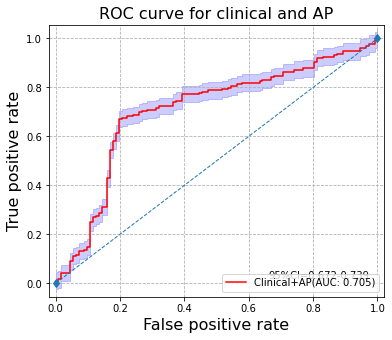

In [94]:
eval_model_clinical_AP(c_x_train_data_ti,ap_x_train_data_ti,ap_c_y_train_data_copy)

[0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
acc= 0.7866666666666666
precision= 0.7291666666666666
recall= 0.9210526315789473
f1= 0.8139534883720931
auc= 0.8125000000000003
0.0732141068051346


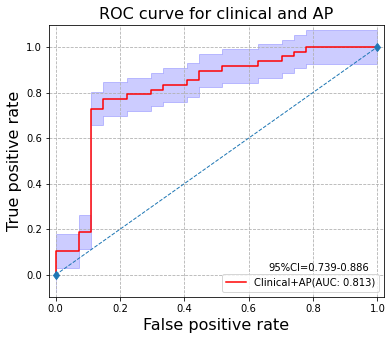

In [212]:
eval_model_clinical_AP(c_x_test_data_ti,ap_x_test_data_ti,ap_c_y_test_data_copy)

In [296]:
model.save_weights('clinical_ap.h5')

## 临床+VP

In [213]:
clinical_VP_train_data = pd.read_csv('vp_clinical_train.csv')
clinical_VP_test_data = pd.read_csv('vp_clinical_test.csv')

In [214]:
c_vp_pvalues_train = p_value2(clinical_VP_train_data.drop(['image_ID','label'],axis=1).values)
# ,clinical_train_data['是否早发'])
print(c_vp_pvalues_train)

c_vp_pvalues_test = p_value2(clinical_VP_test_data.drop(['image_ID','label'],axis=1).values)
# ,clinical_test_data['是否早发'])
print(c_vp_pvalues_test)

0.0045688326970652286
0.006942637944656158


In [215]:
clinical_VP_train_data.iloc[:,0:34]

,image_ID,性别,Ageff,多发或单发病灶,病变直径（mm）,形态及边界,有无门脉癌栓,病变是否有包膜,肝硬化,肿大淋巴结,...,位置_4,位置_5,位置_6,强化方式_0,强化方式_1,强化方式_2,强化方式_3,强化方式_4,乙肝or丙肝_0,乙肝or丙肝_1
0,1001274,1,0,0,178.200000,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1003460,1,0,0,155.400000,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,1
2,1012738,1,1,1,103.800000,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
3,1033001,1,1,1,68.800000,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,1
4,1039069,1,0,0,30.400000,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1227528,0,0,0,78.545171,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
297,3171372,1,0,0,66.482904,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
298,2075572,1,0,0,135.196005,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
299,3396332,1,0,0,70.116352,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [216]:
def get_data_vp_clinical(vp_train_data,vp_test_data):
    vp_y_train_data = vp_train_data['label']
    vp_y_test_data = vp_test_data['label']
    vp_x_train_data = vp_train_data.drop(['image_ID','label'],axis=1).values
    vp_x_test_data = vp_test_data.drop(['image_ID','label'],axis=1).values
    c_x_train_data_ti = vp_x_train_data[:,0:34]
    vp_x_train_data_ti = vp_x_train_data[:,34:]
    c_x_test_data_ti = vp_x_test_data[:,0:34]
    vp_x_test_data_ti = vp_x_test_data[:,34:]
    
    list_num=lasso_feature2(vp_x_train_data_ti, vp_y_train_data)
    lasso_vp_train_data_ti = vp_x_train_data_ti[:,list_num]
    lasso_vp_test_data_ti = vp_x_test_data_ti[:,list_num]
#     list_num2=lasso_feature2(vp_x_train_data_ti, vp_y_train_data)
#     lasso_vp_train_data_ti = vp_x_train_data_ti[:,list_num2]
#     lasso_vp_test_data_ti = vp_x_test_data_ti[:,list_num2]
    lasso_vp_train_data = np.concatenate((c_x_train_data_ti,lasso_vp_train_data_ti),axis=1)
    lasso_vp_test_data = np.concatenate((c_x_test_data_ti,lasso_vp_test_data_ti),axis=1)
    from sklearn import preprocessing
    scaler = preprocessing.MinMaxScaler().fit(lasso_vp_train_data)
    lasso_ap_train_data = scaler.transform(lasso_vp_train_data)
    lasso_ap_test_data=scaler.transform(lasso_vp_test_data)
    num_classes = 2
    vp_y_test_data_copy = vp_y_test_data
    vp_y_train_data_copy = vp_y_train_data
    vp_y_train_data = keras.utils.to_categorical(vp_y_train_data, num_classes)
    vp_y_test_data = keras.utils.to_categorical(vp_y_test_data, num_classes)
    print(lasso_vp_train_data.shape)
    print(lasso_vp_test_data.shape)
    print(vp_y_train_data.shape)
    print(vp_y_test_data.shape)
    return lasso_vp_train_data,lasso_vp_test_data,vp_y_train_data,vp_y_test_data,vp_y_test_data_copy,vp_y_train_data_copy

In [217]:
lasso_vp_c_train_data,lasso_vp_c_test_data,vp_c_y_train_data,vp_c_y_test_data,vp_c_y_test_data_copy,vp_c_y_train_data_copy=get_data_vp_clinical(clinical_VP_train_data,clinical_VP_test_data)







Number of features used: 195
195
(301, 229)
(75, 229)
(301, 2)
(75, 2)


/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.972863724470656, tolerance: 0.007524916943521601
  positive)


In [218]:
c_x_train_data_ti = lasso_vp_c_train_data[:,0:34]
vp_x_train_data_ti = lasso_vp_c_train_data[:,34:]
c_x_test_data_ti = lasso_vp_c_test_data[:,0:34]
vp_x_test_data_ti = lasso_vp_c_test_data[:,34:]
print(vp_x_train_data_ti.shape)
print(c_x_train_data_ti.shape)
print(vp_x_test_data_ti.shape)
print(c_x_test_data_ti.shape)

(301, 195)
(301, 34)
(75, 195)
(75, 34)


In [219]:
input1 = Input(shape=(34,))
input2 = Input(shape=(195,))
x1 = Dense(20)(input1)
x1 = BatchNormalization()(x1)
x1 = Activation(keras.layers.ELU())(x1)
#x1 = Dropout(0.2)(x1)
x1 = Dense(20)(x1)
x1 = BatchNormalization()(x1)
x1 = Activation(keras.layers.ELU())(x1)
#x1 = Dropout(0.2)(x1)
x1 = Dense(20)(input1)
x1 = BatchNormalization()(x1)
x1 = Activation(keras.layers.ELU())(x1)

# model 3--VP
x3 = Dense(40)(input3)
x3 = BatchNormalization()(x3)
x3 = Activation(keras.layers.ELU())(x3)
#x3 = Dropout(0.2)(x3)
x3 = Dense(20)(x3)
x3 = BatchNormalization()(x3)
x3 = Activation(keras.layers.ELU())(x3)

x = keras.layers.Concatenate(axis=1)([x1, x3])
#     x_r = keras.layers.Reshape((3,8))(x)
#     # attention model
#     attention = Dense(1, activation='tanh')(x_r)
#     print(attention)
#     attention = Flatten()(attention)
#     attention = Activation('softmax')(attention)
#     attention = RepeatVector(8)(attention)
#     attention = Permute([2, 1], name='attention_vec')(attention)
#     attention_mul = keras.layers.Multiply()([x_r, attention])
#     x = Flatten()(attention_mul)
x = Dense(9)(x)
x = BatchNormalization()(x)
x = Activation(keras.layers.ELU())(x)
x = Dropout(0.5)(x)
preds = Dense(num_classes, activation='softmax')(x) #no initialization in output layer


model = Model([input1,input3], preds)
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as ELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           (None, 195)          0                                            
__________________________________________________________________________________________________
dense_136 (Dense)               (None, 40)           7840        input_28[0][0]                   
__________________________________________________________________________________________________
batch_normalization_117 (BatchN (None, 40)           160         dense_136[0][0]                  
__________________________________________________________________________________________________
input_32 (InputLayer)           (None, 34)           0                                            
__________________________________________________________________________________________________
activation

In [303]:
model.fit(x=[c_x_train_data_ti,vp_x_train_data_ti], y=vp_c_y_train_data, epochs=200,shuffle=True,batch_size=31
          ,validation_data=([c_x_test_data_ti,vp_x_test_data_ti],vp_c_y_test_data),class_weight='auto')

Train on 301 samples, validate on 75 samples
Epoch 1/200
301/301 [==============================] - 9s 30ms/step - loss: 0.9399 - acc: 0.5382 - val_loss: 0.7735 - val_acc: 0.4000
Epoch 2/200
301/301 [==============================] - 0s 279us/step - loss: 0.8501 - acc: 0.5316 - val_loss: 0.7216 - val_acc: 0.5733
Epoch 3/200
301/301 [==============================] - 0s 402us/step - loss: 0.8371 - acc: 0.5282 - val_loss: 0.6920 - val_acc: 0.6267
Epoch 4/200
301/301 [==============================] - 0s 359us/step - loss: 0.8844 - acc: 0.5415 - val_loss: 0.6700 - val_acc: 0.6267
Epoch 5/200
301/301 [==============================] - 0s 340us/step - loss: 0.7842 - acc: 0.5349 - val_loss: 0.6546 - val_acc: 0.6400
Epoch 6/200
301/301 [==============================] - 0s 388us/step - loss: 0.7735 - acc: 0.5615 - val_loss: 0.6419 - val_acc: 0.6400
Epoch 7/200
301/301 [==============================] - 0s 355us/step - loss: 0.7730 - acc: 0.5714 - val_loss: 0.6323 - val_acc: 0.6533
Epoch 8/200

Epoch 61/200
301/301 [==============================] - 0s 382us/step - loss: 0.6094 - acc: 0.6711 - val_loss: 0.5963 - val_acc: 0.7067
Epoch 62/200
301/301 [==============================] - 0s 380us/step - loss: 0.6356 - acc: 0.6645 - val_loss: 0.5938 - val_acc: 0.6933
Epoch 63/200
301/301 [==============================] - 0s 332us/step - loss: 0.6398 - acc: 0.6777 - val_loss: 0.5893 - val_acc: 0.7067
Epoch 64/200
301/301 [==============================] - 0s 316us/step - loss: 0.6019 - acc: 0.7043 - val_loss: 0.5929 - val_acc: 0.7200
Epoch 65/200
301/301 [==============================] - 0s 329us/step - loss: 0.6370 - acc: 0.6744 - val_loss: 0.6002 - val_acc: 0.7200
Epoch 66/200
301/301 [==============================] - 0s 318us/step - loss: 0.5933 - acc: 0.7010 - val_loss: 0.5993 - val_acc: 0.7200
Epoch 67/200
301/301 [==============================] - 0s 367us/step - loss: 0.6006 - acc: 0.6977 - val_loss: 0.5937 - val_acc: 0.7067
Epoch 68/200
301/301 [==========================

301/301 [==============================] - 0s 348us/step - loss: 0.5408 - acc: 0.7176 - val_loss: 0.5768 - val_acc: 0.7200
Epoch 122/200
301/301 [==============================] - 0s 329us/step - loss: 0.5528 - acc: 0.7143 - val_loss: 0.5898 - val_acc: 0.6933
Epoch 123/200
301/301 [==============================] - 0s 283us/step - loss: 0.5191 - acc: 0.7342 - val_loss: 0.5968 - val_acc: 0.7067
Epoch 124/200
301/301 [==============================] - 0s 342us/step - loss: 0.5347 - acc: 0.7143 - val_loss: 0.6587 - val_acc: 0.6267
Epoch 125/200
301/301 [==============================] - 0s 316us/step - loss: 0.5513 - acc: 0.6811 - val_loss: 0.6622 - val_acc: 0.6267
Epoch 126/200
301/301 [==============================] - 0s 313us/step - loss: 0.5352 - acc: 0.7276 - val_loss: 0.6145 - val_acc: 0.6800
Epoch 127/200
301/301 [==============================] - 0s 339us/step - loss: 0.5499 - acc: 0.7010 - val_loss: 0.5772 - val_acc: 0.7200
Epoch 128/200
301/301 [==============================] 

Epoch 181/200
301/301 [==============================] - 0s 425us/step - loss: 0.4795 - acc: 0.7741 - val_loss: 0.6168 - val_acc: 0.6933
Epoch 182/200
301/301 [==============================] - 0s 351us/step - loss: 0.5001 - acc: 0.7409 - val_loss: 0.6007 - val_acc: 0.6667
Epoch 183/200
301/301 [==============================] - 0s 353us/step - loss: 0.5206 - acc: 0.7641 - val_loss: 0.5525 - val_acc: 0.7333
Epoch 184/200
301/301 [==============================] - 0s 322us/step - loss: 0.5319 - acc: 0.7575 - val_loss: 0.5734 - val_acc: 0.7200
Epoch 185/200
301/301 [==============================] - 0s 287us/step - loss: 0.4846 - acc: 0.7807 - val_loss: 0.5733 - val_acc: 0.7200
Epoch 186/200
301/301 [==============================] - 0s 342us/step - loss: 0.5126 - acc: 0.7409 - val_loss: 0.5554 - val_acc: 0.7200
Epoch 187/200
301/301 [==============================] - 0s 327us/step - loss: 0.5181 - acc: 0.7542 - val_loss: 0.6359 - val_acc: 0.6933
Epoch 188/200
301/301 [==================

In [220]:
model.load_weights('clinical_vp.h5')

In [221]:
def eval_model_clinical_VP(lasso_ap_test_data,lasso_ap_test_data2,ap_y_test_data_copy):
    #ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
    #ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
    ap_y_pred = model.predict([lasso_ap_test_data,lasso_ap_test_data2])
    #ap_y_pred = model.predict(ap_x_test_data)
    #print(ap_y_pred)
    ap_y_pred=np.argmax(ap_y_pred,axis=1)
    print(ap_y_pred)
    y_data_one = ap_y_test_data_copy
    ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
    print('acc=',ap_acc)
    ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
    print('precision=',ap_precision)
    ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
    print('recall=',ap_recall)
    ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
    print('f1=',ap_f1)
    tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
    print('auc=',auc0)
    plt.figure(figsize=(6,5))
    plt.margins(0.02,0.02)
    plt.plot(fpr0,tpr0,'red',label="Clinical+VP(AUC: {:.3f})".format(auc0),linewidth=1.5)
    plt.plot([0,1],[0,1],'d--',linewidth=1)
    ci = confidence_interval(tpr0)
    print(ci)
    plt.fill_between(fpr0,tpr0-ci,tpr0+ci,color='blue',alpha=0.2)
    plt.text(0.66, 0.02, '95%CI={:.3f}-{:.3f}'.format(auc0-ci,auc0+ci))
    plt.xlabel("False positive rate",fontsize=16)
    plt.ylabel("True positive rate",fontsize=16)
    plt.title("ROC curve for clinical and VP",fontsize=16)
    plt.legend(loc="lower right",fontsize=10)
    plt.grid(linestyle='--')
#     plt.show()
    # save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
    plt.savefig("roc_clinical_vp.pdf",bbox_inches = 'tight',dpi=500)

[1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 1 1]
acc= 0.7940199335548173
precision= 0.8333333333333334
recall= 0.7333333333333333
f1= 0.7801418439716311
auc= 0.7693204231665769
0.03436685625507396


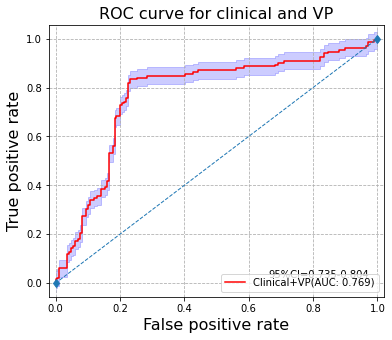

In [106]:
eval_model_clinical_VP(c_x_train_data_ti,vp_x_train_data_ti,vp_c_y_train_data_copy)

[0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0]
acc= 0.76
precision= 0.7631578947368421
recall= 0.7631578947368421
f1= 0.7631578947368421
auc= 0.7332859174964433
0.07705442428740872


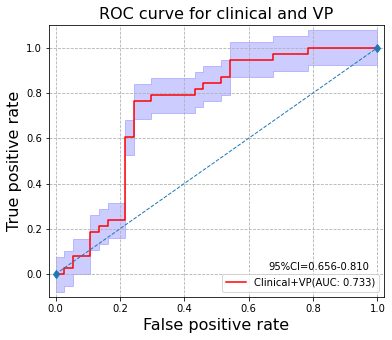

In [222]:
eval_model_clinical_VP(c_x_test_data_ti,vp_x_test_data_ti,vp_c_y_test_data_copy)

In [306]:
model.save_weights('clinical_vp.h5')

### 临床+AP+VP

In [223]:
all_train_data = pd.read_csv('AP_VP_clinical_traindata.csv')
all_test_data = pd.read_csv('AP_VP_clinical_testdata.csv')

In [224]:
all_pvalues_train = p_value2(all_train_data.drop(['image_ID','是否早发'],axis=1).values)
# ,clinical_train_data['是否早发'])
print(all_pvalues_train)

all_pvalues_test = p_value2(all_test_data.drop(['image_ID','是否早发'],axis=1).values)
# ,clinical_test_data['是否早发'])
print(all_pvalues_test)

0.0037316442088663575
0.006443496279646763


In [225]:
all_train_data.iloc[:,21:1688+21]

,AP_original_shape_Elongation,AP_original_shape_Flatness,AP_original_shape_LeastAxisLength,AP_original_shape_MajorAxisLength,AP_original_shape_Maximum2DDiameterColumn,AP_original_shape_Maximum2DDiameterRow,AP_original_shape_Maximum2DDiameterSlice,AP_original_shape_Maximum3DDiameter,AP_original_shape_MeshVolume,AP_original_shape_MinorAxisLength,...,AP_wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,AP_wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,AP_wavelet-LLL_glszm_ZoneEntropy,AP_wavelet-LLL_glszm_ZonePercentage,AP_wavelet-LLL_glszm_ZoneVariance,AP_wavelet-LLL_ngtdm_Busyness,AP_wavelet-LLL_ngtdm_Coarseness,AP_wavelet-LLL_ngtdm_Complexity,AP_wavelet-LLL_ngtdm_Contrast,AP_wavelet-LLL_ngtdm_Strength
0,0.790025,0.707721,118.584454,167.558261,156.310588,194.671518,178.213355,195.910694,1.872709e+06,132.375289,...,5420.516873,0.000370,8.799123,0.028201,1.021337e+07,2.675659,0.000009,9753.466600,0.006117,1.365630
1,0.943950,0.753214,101.730724,135.062142,145.464772,165.801086,155.769060,166.886189,1.234671e+06,127.491913,...,4967.544670,0.000370,8.813622,0.032369,6.173141e+06,2.575668,0.000011,10529.059010,0.002854,1.586583
2,0.720666,0.589505,78.267967,132.768870,146.328398,147.959454,119.616052,148.489057,7.033972e+05,95.682023,...,4358.861641,0.000238,8.165928,0.014601,4.156255e+06,1.391729,0.000032,5041.078375,0.000630,1.398648
3,0.888830,0.786304,57.904867,73.641823,78.600254,87.464278,77.006493,87.783825,1.995404e+05,65.455085,...,4904.796866,0.000614,8.910860,0.191145,2.128022e+04,0.304494,0.000115,91849.567540,0.308119,4.759007
4,0.714713,0.580994,19.498755,33.561042,33.837849,33.837849,34.785054,39.306488,9.521667e+03,23.986503,...,17.046960,0.017054,5.869622,0.013174,1.674567e+05,7.075320,0.001120,38.113841,0.011130,0.133618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.895842,0.813678,51.511481,63.392664,79.792345,75.750329,78.621662,81.806631,1.279263e+05,56.688806,...,7546.673303,0.000394,8.356783,0.216879,1.672011e+05,0.242312,0.000223,39902.553106,0.042291,6.762397
297,0.667524,0.523214,34.341657,67.189797,57.750478,77.015939,62.829559,79.441045,6.613648e+04,44.173435,...,124.137897,0.003373,7.092903,0.037573,3.230793e+05,5.987238,0.000181,283.912007,0.014417,0.157424
298,0.869366,0.709218,92.391083,130.535877,147.993460,150.758561,136.268129,152.289104,9.608622e+05,112.782116,...,6301.412642,0.000223,8.651775,0.035695,4.271642e+06,1.723106,0.000015,13213.367387,0.003444,2.045178
299,0.779146,0.628777,39.931265,64.966411,64.442102,77.250852,68.587055,78.364658,8.408174e+04,49.723913,...,367.709349,0.002369,7.441685,0.051598,2.327302e+05,3.295822,0.000170,1371.732209,0.009016,1.188479


In [226]:
def get_data_all(vp_train_data,vp_test_data):
    vp_y_train_data = vp_train_data['是否早发']
    vp_y_test_data = vp_test_data['是否早发']
    vp_x_train_data = vp_train_data.drop(['image_ID','是否早发'],axis=1).values
    vp_x_test_data = vp_test_data.drop(['image_ID','是否早发'],axis=1).values
    c_x_train_data_ti = np.concatenate((vp_x_train_data[:,0:21],vp_x_train_data[:,21+1688+1688:]),axis=1)
    ap_x_train_data_ti = vp_x_train_data[:,21:21+1688]
    vp_x_train_data_ti = vp_x_train_data[:,21+1688:21+1688+1688]
    c_x_test_data_ti=np.concatenate((vp_x_test_data[:,0:21],vp_x_test_data[:,21+1688+1688:]),axis=1)
    ap_x_test_data_ti = vp_x_test_data[:,21:21+1688]
    vp_x_test_data_ti = vp_x_test_data[:,21+1688:21+1688+1688]
    
    list_num=lasso_feature(ap_x_train_data_ti, vp_y_train_data)
    lasso_ap_train_data_ti = ap_x_train_data_ti[:,list_num]
    lasso_ap_test_data_ti = ap_x_test_data_ti[:,list_num]
    list_num2=lasso_feature2(vp_x_train_data_ti, vp_y_train_data)
    lasso_vp_train_data_ti = vp_x_train_data_ti[:,list_num2]
    lasso_vp_test_data_ti = vp_x_test_data_ti[:,list_num2]
    lasso_vp_train_data = np.concatenate((c_x_train_data_ti,lasso_ap_train_data_ti,lasso_vp_train_data_ti),axis=1)
    lasso_vp_test_data = np.concatenate((c_x_test_data_ti,lasso_ap_test_data_ti,lasso_vp_test_data_ti),axis=1)
    from sklearn import preprocessing
    scaler = preprocessing.MinMaxScaler().fit(lasso_vp_train_data)
    lasso_ap_train_data = scaler.transform(lasso_vp_train_data)
    lasso_ap_test_data=scaler.transform(lasso_vp_test_data)
    num_classes = 2
    vp_y_test_data_copy = vp_y_test_data
    vp_y_train_data_copy = vp_y_train_data
    vp_y_train_data = keras.utils.to_categorical(vp_y_train_data, num_classes)
    vp_y_test_data = keras.utils.to_categorical(vp_y_test_data, num_classes)
    print(lasso_vp_train_data.shape)
    print(lasso_vp_test_data.shape)
    print(vp_y_train_data.shape)
    print(vp_y_test_data.shape)
    return lasso_vp_train_data,lasso_vp_test_data,vp_y_train_data,vp_y_test_data,vp_y_test_data_copy,vp_y_train_data_copy
    

In [227]:
lasso_all_train_data,lasso_all_test_data,all_y_train_data,all_y_test_data,all_y_test_data_copy,all_y_train_data_copy=get_data_all(all_train_data,all_test_data)







/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.574708457783272, tolerance: 0.007524916943521601
  positive)


Number of features used: 176
176
Number of features used: 195
195
(301, 405)
(75, 405)
(301, 2)
(75, 2)


/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.972863724470656, tolerance: 0.007524916943521601
  positive)


In [228]:
c_x_train_data_ti = lasso_all_train_data[:,0:34]
ap_x_train_data_ti = lasso_all_train_data[:,34:34+176]
vp_x_train_data_ti = lasso_all_train_data[:,34+176:]
c_x_test_data_ti = lasso_all_test_data[:,0:34]
ap_x_test_data_ti = lasso_all_test_data[:,34:34+176]
vp_x_test_data_ti = lasso_all_test_data[:,34+176:]
print(ap_x_train_data_ti.shape)
print(vp_x_train_data_ti.shape)
print(c_x_train_data_ti.shape)
print(ap_x_test_data_ti.shape)
print(vp_x_test_data_ti.shape)
print(c_x_test_data_ti.shape)

(301, 176)
(301, 195)
(301, 34)
(75, 176)
(75, 195)
(75, 34)


In [229]:
def merge_model(input1,input2,input3,num_classes):
    # model 1--clinical
    x1 = Dense(20)(input1)
    x1 = BatchNormalization()(x1)
    x1 = Activation(keras.layers.ELU())(x1)
    #x1 = Dropout(0.2)(x1)
    x1 = Dense(20)(x1)
    x1 = BatchNormalization()(x1)
    x1 = Activation(keras.layers.ELU())(x1)
    #x1 = Dropout(0.2)(x1)
    x1 = Dense(20)(input1)
    x1 = BatchNormalization()(x1)
    x1 = Activation(keras.layers.ELU())(x1)
    
    # model 2--AP
    x2 = Dense(80)(input2)
    x2 = BatchNormalization()(x2)
    x2 = Activation(keras.layers.ELU())(x2)
    x2 = Dropout(0.3)(x2)
    x2 = Dense(50)(x2)
    x2 = BatchNormalization()(x2)
    x2 = Activation(keras.layers.ELU())(x2)
    x2 = Dropout(0.3)(x2)
    x2 = Dense(20)(x2)
    x2 = BatchNormalization()(x2)
    x2 = Activation(keras.layers.ELU())(x2)
    x2 = Dropout(0.5)(x2)
    x2 = Dense(20)(x2)
    x2 = BatchNormalization()(x2)
    x2 = Activation(keras.layers.ELU())(x2)
    x2 = Dropout(0.5)(x2)
    
    # model 3--VP
    x3 = Dense(40)(input3)
    x3 = BatchNormalization()(x3)
    x3 = Activation(keras.layers.ELU())(x3)
    x3 = Dropout(0.6)(x3)
    x3 = Dense(20)(x3)
    x3 = BatchNormalization()(x3)
    x3 = Activation(keras.layers.ELU())(x3)
    x3 = Dropout(0.6)(x3)
    
    x = keras.layers.Concatenate(axis=1)([x1, x2,x3])
    #x = keras.layers.Multiply()
#     x_r = keras.layers.Reshape((3,8))(x)
#     # attention model
#     attention = Dense(1, activation='tanh')(x_r)
#     print(attention)
#     attention = Flatten()(attention)
#     attention = Activation('softmax')(attention)
#     attention = RepeatVector(8)(attention)
#     attention = Permute([2, 1], name='attention_vec')(attention)
#     attention_mul = keras.layers.Multiply()([x_r, attention])
#     x = Flatten()(attention_mul)
    x = Dense(14)(x)
    x = BatchNormalization()(x)
    x = Activation(keras.layers.ELU())(x)
    x = Dropout(0.5)(x)
    preds = Dense(num_classes, activation='softmax')(x) #no initialization in output layer


    model = Model([input1,input2,input3], preds)
    return model

In [230]:
input1 = Input(shape=(34,))
input2 = Input(shape=(176,))
input3 = Input(shape=(195,))
model = merge_model(input1,input2,input3,2)
model.summary()
#         model = Sequential()
#         model = MLP(model,input_shape=(237,),num_classes=2)
#model.compile(optimizer='adam', loss=categorical_focal_loss(gamma=1.25, alpha=0.25), metrics=['accuracy'])
model.compile(optimizer='nadam', loss="categorical_crossentropy", metrics=["accuracy"])

/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as ELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_35 (InputLayer)           (None, 176)          0                                            
__________________________________________________________________________________________________
dense_143 (Dense)               (None, 80)           14160       input_35[0][0]                   
__________________________________________________________________________________________________
batch_normalization_123 (BatchN (None, 80)           320         dense_143[0][0]                  
__________________________________________________________________________________________________
activation_123 (Activation)     (None, 80)           0           batch_normalization_123[0][0]    
__________________________________________________________________________________________________
dropout_81

In [231]:
model.load_weights('all.h5')

In [582]:
model.fit(x=[c_x_train_data_ti,ap_x_train_data_ti,vp_x_train_data_ti], y=all_y_train_data, epochs=2,shuffle=True,batch_size=31
          ,validation_data=([c_x_test_data_ti,ap_x_test_data_ti,vp_x_test_data_ti],all_y_test_data),class_weight='auto')

Train on 301 samples, validate on 75 samples
Epoch 1/2
301/301 [==============================] - 0s 582us/step - loss: 0.4670 - acc: 0.7973 - val_loss: 0.4938 - val_acc: 0.7867
Epoch 2/2
301/301 [==============================] - 0s 592us/step - loss: 0.4401 - acc: 0.8140 - val_loss: 0.5123 - val_acc: 0.8400


[1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1
 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1]
acc= 0.8205980066445183
precision= 0.8
recall= 0.8533333333333334
f1= 0.8258064516129033
auc= 0.7871010638297852
0.03427535862360926


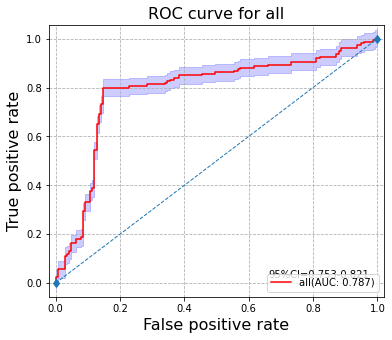

In [232]:
from sklearn import metrics
#ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
#ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
ap_y_pred = model.predict([c_x_train_data_ti,ap_x_train_data_ti,vp_x_train_data_ti])
#ap_y_pred = model.predict(ap_x_test_data)
#print(ap_y_pred)
ap_y_pred=np.argmax(ap_y_pred,axis=1)
print(ap_y_pred)
y_data_one = all_y_train_data_copy
ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
print('acc=',ap_acc)
ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
print('precision=',ap_precision)
ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
print('recall=',ap_recall)
ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
print('f1=',ap_f1)
tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
print('auc=',auc0)

ci = confidence_interval(tpr0)
# ci = st.norm.interval(0.95,loc=np.mean(tpr0), scale=st.sem(tpr0))
print(ci)
plt.figure(figsize=(6,5))
plt.margins(0.02,0.02)
plt.plot(fpr0,tpr0,'red',label="all(AUC: {:.3f})".format(auc0),linewidth=1.5)
plt.fill_between(fpr0,tpr0-ci,tpr0+ci,color='blue',alpha=0.2)
plt.plot([0,1],[0,1],'d--',linewidth=1)
plt.text(0.66, 0.02, '95%CI={:.3f}-{:.3f}'.format(auc0-ci,auc0+ci))
plt.xlabel("False positive rate",fontsize=16)
plt.ylabel("True positive rate",fontsize=16)
plt.title("ROC curve for all",fontsize=16)
plt.legend(loc="lower right",fontsize=10)
plt.grid(linestyle='--')
# plt.show()
#save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
plt.savefig("roc_all.pdf",bbox_inches = 'tight',dpi=500)

[0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
acc= 0.8266666666666667
precision= 0.7906976744186046
recall= 0.8947368421052632
f1= 0.8395061728395061
auc= 0.8299418604651164
0.07402038787288075


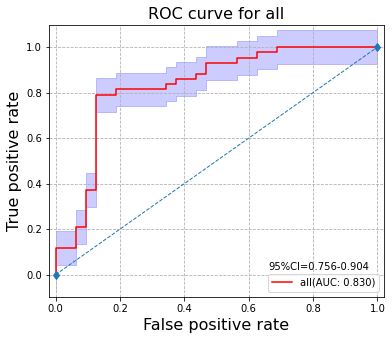

In [233]:
from sklearn import metrics
#ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
#ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
ap_y_pred = model.predict([c_x_test_data_ti,ap_x_test_data_ti,vp_x_test_data_ti])
#ap_y_pred = model.predict(ap_x_test_data)
#print(ap_y_pred)
ap_y_pred=np.argmax(ap_y_pred,axis=1)
print(ap_y_pred)
y_data_one = all_y_test_data_copy
ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
print('acc=',ap_acc)
ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
print('precision=',ap_precision)
ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
print('recall=',ap_recall)
ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
print('f1=',ap_f1)
tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
print('auc=',auc0)

ci = confidence_interval(tpr0)
# ci = st.norm.interval(0.95,loc=np.mean(tpr0), scale=st.sem(tpr0))
print(ci)
plt.figure(figsize=(6,5))
plt.margins(0.02,0.02)
plt.plot(fpr0,tpr0,'red',label="all(AUC: {:.3f})".format(auc0),linewidth=1.5)
plt.fill_between(fpr0,tpr0-ci,tpr0+ci,color='blue',alpha=0.2)
plt.plot([0,1],[0,1],'d--',linewidth=1)
plt.text(0.66, 0.02, '95%CI={:.3f}-{:.3f}'.format(auc0-ci,auc0+ci))
plt.xlabel("False positive rate",fontsize=16)
plt.ylabel("True positive rate",fontsize=16)
plt.title("ROC curve for all",fontsize=16)
plt.legend(loc="lower right",fontsize=10)
plt.grid(linestyle='--')
# plt.show()
#save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
plt.savefig("roc_all.pdf",bbox_inches = 'tight',dpi=500)

In [576]:
model.save_weights('all.h5')

## lasso figure 

In [1724]:
ap_train_data = pd.read_csv('ap_train.csv')
ap_test_data = pd.read_csv('ap_test.csv')

ap_y_train_data = ap_train_data['label']
ap_y_test_data = ap_test_data['label']

ap_x_train_data = ap_train_data.drop(['image_ID','label'],axis=1)
ap_x_test_data = ap_test_data.drop(['image_ID','label'],axis=1)

from sklearn.linear_model import LassoLarsCV
model=LassoLarsCV(cv=5,max_iter=100000).fit(ap_x_train_data,ap_y_train_data)

/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_least_angle.py:577: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 21 iterations, i.e. alpha=2.915e-03, with an active set of 19 regressors, and the smallest cholesky pivot element being 3.942e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_least_angle.py:577: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 34 iterations, i.e. alpha=2.419e-03, with an active set of 32 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_least_angle.py:577: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 57 iterations, i.e. a

/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_least_angle.py:577: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 37 iterations, i.e. alpha=1.910e-03, with an active set of 27 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_least_angle.py:577: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 37 iterations, i.e. alpha=1.910e-03, with an active set of 27 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_least_angle.py:577: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 103 iterations, i.e. 

In [1725]:
conef_dirc = dict(zip(ap_train_data.columns, model.coef_))

none_zero_name = []
none_zero_value = []
for name in conef_dirc:
    print(name)
    if conef_dirc[name]!=0:
        none_zero_name.append(name)
        none_zero_value.append(conef_dirc[name])

AP_original_shape_Elongation
AP_original_shape_Flatness
AP_original_shape_LeastAxisLength
AP_original_shape_MajorAxisLength
AP_original_shape_Maximum2DDiameterColumn
AP_original_shape_Maximum2DDiameterRow
AP_original_shape_Maximum2DDiameterSlice
AP_original_shape_Maximum3DDiameter
AP_original_shape_MeshVolume
AP_original_shape_MinorAxisLength
AP_original_shape_Sphericity
AP_original_shape_SurfaceArea
AP_original_shape_SurfaceVolumeRatio
AP_original_shape_VoxelVolume
AP_original_firstorder_10Percentile
AP_original_firstorder_90Percentile
AP_original_firstorder_Energy
AP_original_firstorder_Entropy
AP_original_firstorder_InterquartileRange
AP_original_firstorder_Kurtosis
AP_original_firstorder_Maximum
AP_original_firstorder_MeanAbsoluteDeviation
AP_original_firstorder_Mean
AP_original_firstorder_Median
AP_original_firstorder_Minimum
AP_original_firstorder_Range
AP_original_firstorder_RobustMeanAbsoluteDeviation
AP_original_firstorder_RootMeanSquared
AP_original_firstorder_Skewness
AP_ori

In [1726]:
dict(zip(none_zero_name, none_zero_value))

{'AP_original_shape_Sphericity': -0.46133436717164145,
 'AP_exponential_glrlm_ShortRunLowGrayLevelEmphasis': -1.112865096979469,
 'AP_exponential_ngtdm_Complexity': 0.0009243237936800851,
 'AP_lbp-2D_firstorder_Median': -0.016037193373522527,
 'AP_lbp-3D-k_firstorder_Kurtosis': 0.001565339591022101,
 'AP_logarithm_firstorder_90Percentile': 1.041201084411075e-05,
 'AP_logarithm_gldm_SmallDependenceHighGrayLevelEmphasis': 2.4158700428775982e-05,
 'AP_logarithm_glrlm_ShortRunHighGrayLevelEmphasis': 2.8500168463801704e-05,
 'AP_wavelet-LHL_firstorder_Skewness': 0.008622169972938425,
 'AP_wavelet-LHH_glcm_Contrast': 1.261654012413657,
 'AP_wavelet-HLL_firstorder_Skewness': 0.035345153757768366,
 'AP_wavelet-HLH_glszm_ZoneEntropy': 0.009417328325682461,
 'AP_wavelet-HHH_gldm_SmallDependenceLowGrayLevelEmphasis': -4.921442835667451,
 'AP_wavelet-HHH_glszm_SmallAreaEmphasis': 0.2836416092478016}

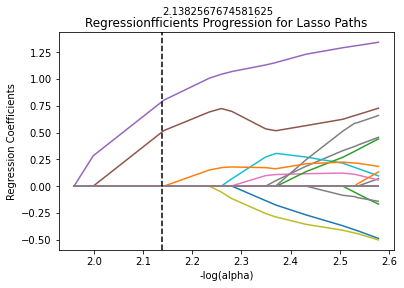

In [1727]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_)-0.44, linestyle='--', color='k',label='alpha CV')
plt.text(-np.log10(model.alpha_)-0.44,1.6, -np.log10(model.alpha_)-0.44)
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regressionfficients Progression for Lasso Paths')
plt.savefig("lasso_ap_path.png",bbox_inches = 'tight',dpi=500)

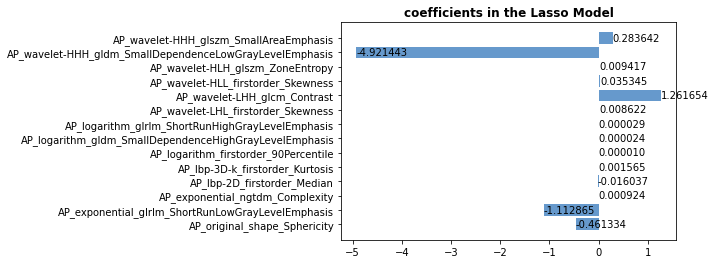

<Figure size 432x288 with 0 Axes>

In [1728]:

#绘图。
fig, ax = plt.subplots()
b = ax.barh(range(len(dict(zip(none_zero_name, none_zero_value)))), none_zero_value, color='#6699CC')
 
#为横向水平的柱图右侧添加数据标签。
for rect in b:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, '%.6f' %
            w, ha='left', va='center')
 
#设置Y轴纵坐标上的刻度线标签。
ax.set_yticks(range(len(none_zero_name)))
ax.set_yticklabels(none_zero_name)
 
#不要X横坐标上的label标签。
plt.xticks()
 
plt.title('coefficients in the Lasso Model', loc='center', fontsize='12',
          fontweight='bold', color='black')
 
plt.show()
plt.savefig("lasso_coefficients_ap.png",bbox_inches = 'tight',dpi=500)

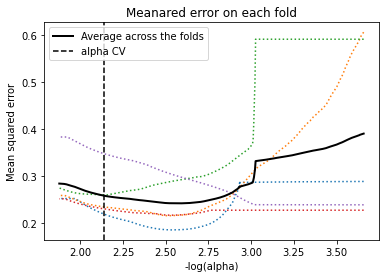

In [1729]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
 label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_)-0.44, linestyle='--', color='k',
 label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Meanared error on each fold')
plt.savefig("lasso_mse_ap.png",bbox_inches = 'tight',dpi=500)

In [1698]:
vp_train_data = pd.read_csv('vp_train.csv')
vp_test_data = pd.read_csv('vp_test.csv')

vp_y_train_data = vp_train_data['label']
vp_y_test_data = vp_test_data['label']

vp_x_train_data = vp_train_data.drop(['image_ID','label'],axis=1)
vp_x_test_data = vp_test_data.drop(['image_ID','label'],axis=1)

# from sklearn.linear_model import LassoLarsCV
# model=Lasso(alpha=2,max_iter=10000).fit(vp_x_train_data,vp_y_train_data)
model1=LassoLarsCV(cv=10).fit(vp_x_train_data,vp_y_train_data)

/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_least_angle.py:577: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 40 iterations, i.e. alpha=1.811e-03, with an active set of 38 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_least_angle.py:577: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 62 iterations, i.e. alpha=1.366e-03, with an active set of 58 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_least_angle.py:577: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 89 iterations, i.e. a

/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_least_angle.py:577: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 18 iterations, i.e. alpha=2.729e-03, with an active set of 18 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_least_angle.py:577: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 55 iterations, i.e. alpha=1.405e-03, with an active set of 49 regressors, and the smallest cholesky pivot element being 6.053e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_least_angle.py:603: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha

In [1687]:
temp_array = []
import random
for i in range(15):
    temp_num = random.uniform(-model1.alpha_,model1.alpha_)
    temp_array.append(temp_num)


In [1688]:
random.uniform(-model1.alpha_,model1.alpha_)

0.0011433270413951078

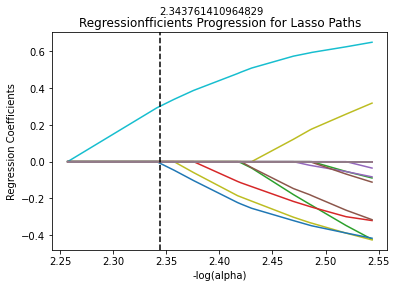

In [1723]:
# plot coefficient progression
m_log_alphas = -np.log10(model1.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model1.coef_path_.T)
plt.axvline(-np.log10(model1.alpha_)-0.2, linestyle='--', color='k',label='alpha CV')
plt.text(-np.log10(model1.alpha_)-0.2,0.8, -np.log10(model1.alpha_)-0.2)
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regressionfficients Progression for Lasso Paths')
plt.savefig("lasso_vp_path.png",bbox_inches = 'tight',dpi=500)

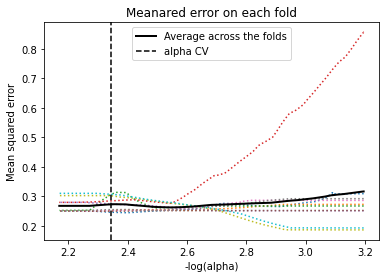

In [1722]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model1.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model1.mse_path_, ':')
plt.plot(m_log_alphascv, model1.mse_path_.mean(axis=-1), 'k',
 label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model1.alpha_)-0.2, linestyle='--', color='k',
 label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Meanared error on each fold')
plt.savefig("lasso_mse_vp.png",bbox_inches = 'tight',dpi=500)

In [1719]:
conef_dirc = dict(zip(vp_train_data.columns, model1.coef_))

none_zero_name = []
none_zero_value = []
for name in conef_dirc:
    print(name)
    if conef_dirc[name]!=0:
        none_zero_name.append(name)
        none_zero_value.append(conef_dirc[name])

VP_original_shape_Elongation
VP_original_shape_Flatness
VP_original_shape_LeastAxisLength
VP_original_shape_MajorAxisLength
VP_original_shape_Maximum2DDiameterColumn
VP_original_shape_Maximum2DDiameterRow
VP_original_shape_Maximum2DDiameterSlice
VP_original_shape_Maximum3DDiameter
VP_original_shape_MeshVolume
VP_original_shape_MinorAxisLength
VP_original_shape_Sphericity
VP_original_shape_SurfaceArea
VP_original_shape_SurfaceVolumeRatio
VP_original_shape_VoxelVolume
VP_original_firstorder_10Percentile
VP_original_firstorder_90Percentile
VP_original_firstorder_Energy
VP_original_firstorder_Entropy
VP_original_firstorder_InterquartileRange
VP_original_firstorder_Kurtosis
VP_original_firstorder_Maximum
VP_original_firstorder_MeanAbsoluteDeviation
VP_original_firstorder_Mean
VP_original_firstorder_Median
VP_original_firstorder_Minimum
VP_original_firstorder_Range
VP_original_firstorder_RobustMeanAbsoluteDeviation
VP_original_firstorder_RootMeanSquared
VP_original_firstorder_Skewness
VP_ori

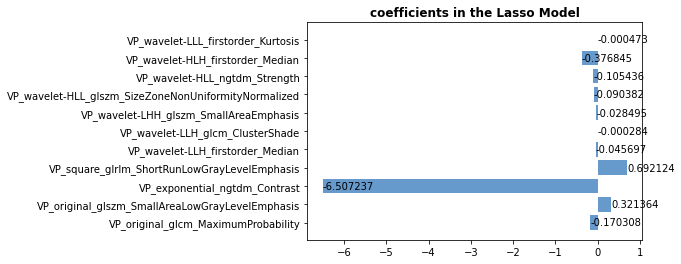

<Figure size 432x288 with 0 Axes>

In [1721]:

#绘图。
fig, ax = plt.subplots()
b = ax.barh(range(len(dict(zip(none_zero_name, none_zero_value)))), none_zero_value, color='#6699CC')
 
#为横向水平的柱图右侧添加数据标签。
for rect in b:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, '%.6f' %
            w, ha='left', va='center')
 
#设置Y轴纵坐标上的刻度线标签。
ax.set_yticks(range(len(none_zero_name)))
ax.set_yticklabels(none_zero_name)
 
#不要X横坐标上的label标签。
plt.xticks()
 
plt.title('coefficients in the Lasso Model', loc='center', fontsize='12',
          fontweight='bold', color='black')
 
plt.show()
plt.savefig("lasso_coefficients_vp.png",bbox_inches = 'tight',dpi=500)

In [399]:
import pandas as pd
import numpy as np
data1_df = pd.read_csv('data1.csv',encoding='utf8')
print(data1_df.shape)
y_data = data1_df['是否早发']
x_data = data1_df.drop(['是否早发','image_ID'],axis = 1)
#ap_values = x_data.iloc[:,22:1688+22]


(297, 3400)


In [400]:
data1_df

,image_ID,性别,Ageff,是否早发,多发或单发病灶,位置,病变直径（mm）,形态及边界,强化方式,有无门脉癌栓,...,VP_wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,VP_wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,VP_wavelet-LLL_glszm_ZoneEntropy,VP_wavelet-LLL_glszm_ZonePercentage,VP_wavelet-LLL_glszm_ZoneVariance,VP_wavelet-LLL_ngtdm_Busyness,VP_wavelet-LLL_ngtdm_Coarseness,VP_wavelet-LLL_ngtdm_Complexity,VP_wavelet-LLL_ngtdm_Contrast,VP_wavelet-LLL_ngtdm_Strength
0,1001274,1,0,1,0,3,178.2,0,1,0,...,86.779230,0.005355,6.699791,0.032156,2.776362e+04,0.731378,0.002220,185.792928,0.020325,1.052688
1,1003460,1,0,1,0,0,155.4,0,4,0,...,4453.094889,0.000440,8.631866,0.260881,1.153559e+04,0.179285,0.000202,54204.259290,0.136175,8.770643
2,1012738,1,1,1,1,6,103.8,0,4,0,...,4014.991080,0.009006,7.485477,0.196005,3.851488e+03,0.116785,0.001740,20069.861370,0.631691,58.298070
3,1012946,1,0,0,0,1,18.4,0,4,0,...,69.054599,0.011060,6.902732,0.031107,5.286011e+04,2.392646,0.000999,134.486989,0.031788,0.267376
4,1014451,1,1,0,0,0,71.5,0,1,0,...,4475.913067,0.000189,7.714206,0.057016,1.523634e+05,0.381125,0.000145,5599.388887,0.005140,3.900895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,14632596,1,0,0,0,0,19.1,0,3,0,...,9354.982449,0.000517,8.612781,0.313043,1.422034e+02,0.014260,0.002154,33553.951950,0.143674,49.098102
293,18880158,1,0,0,0,3,40.0,0,4,0,...,6621.588654,0.000792,7.983940,0.139313,1.789322e+04,0.155831,0.000240,15652.070140,0.085250,7.981672
294,43844998,1,1,1,0,0,70.8,0,4,0,...,7041.645196,0.000689,8.991597,0.041242,2.502568e+06,1.480868,0.000016,12890.608160,0.015583,1.341153
295,75242152,1,0,0,0,0,49.2,0,4,0,...,1297.476836,0.000332,7.557914,0.043728,2.258897e+05,1.041934,0.000146,2174.654820,0.006442,1.606600


In [401]:
from imblearn.over_sampling import SMOTE, ADASYN
x_data, y_data = SMOTE().fit_sample(x_data, y_data)
y_data

0      1
1      1
2      1
3      0
4      0
      ..
371    1
372    1
373    1
374    1
375    1
Name: 是否早发, Length: 376, dtype: int64

In [402]:
y_data_copy = y_data
y_data_copy

0      1
1      1
2      1
3      0
4      0
      ..
371    1
372    1
373    1
374    1
375    1
Name: 是否早发, Length: 376, dtype: int64

## 转变离散数据为one-hot编码

In [403]:
## 位置和强化方式转变为one-hot
x_data['位置'] = x_data['位置'].astype(str)

pd.get_dummies(x_data['位置'], prefix='位置').head()

,位置_0,位置_1,位置_2,位置_3,位置_4,位置_5,位置_6
0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [404]:
x_data['强化方式'] = x_data['强化方式'].astype(str)

pd.get_dummies(x_data['强化方式'], prefix='强化方式').head()

,强化方式_0,强化方式_1,强化方式_2,强化方式_3,强化方式_4
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0


In [405]:
x_data['乙肝or丙肝'] = x_data['乙肝or丙肝'].astype(str)

pd.get_dummies(x_data['乙肝or丙肝'], prefix='乙肝or丙肝').head()

,乙肝or丙肝_0,乙肝or丙肝_1,乙肝or丙肝_2
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [406]:
x_data_new = pd.get_dummies(x_data)
x_data_new.head()

,性别,Ageff,多发或单发病灶,病变直径（mm）,形态及边界,有无门脉癌栓,病变是否有包膜,肝硬化,肿大淋巴结,术中是否放粒子或射频,...,位置_5,位置_6,强化方式_0,强化方式_1,强化方式_2,强化方式_3,强化方式_4,乙肝or丙肝_0,乙肝or丙肝_1,乙肝or丙肝_2
0,1,0,0,178.2,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,155.4,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
2,1,1,1,103.8,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,1,0,0,18.4,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,1,1,0,71.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [407]:
x_data_new.isnull().sum().sum()

0

In [408]:
x_data_new.iloc[:,20:1688+20]

,AP_original_shape_Flatness,AP_original_shape_LeastAxisLength,AP_original_shape_MajorAxisLength,AP_original_shape_Maximum2DDiameterColumn,AP_original_shape_Maximum2DDiameterRow,AP_original_shape_Maximum2DDiameterSlice,AP_original_shape_Maximum3DDiameter,AP_original_shape_MeshVolume,AP_original_shape_MinorAxisLength,AP_original_shape_Sphericity,...,AP_wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,AP_wavelet-LLL_glszm_ZoneEntropy,AP_wavelet-LLL_glszm_ZonePercentage,AP_wavelet-LLL_glszm_ZoneVariance,AP_wavelet-LLL_ngtdm_Busyness,AP_wavelet-LLL_ngtdm_Coarseness,AP_wavelet-LLL_ngtdm_Complexity,AP_wavelet-LLL_ngtdm_Contrast,AP_wavelet-LLL_ngtdm_Strength,VP_original_shape_Elongation
0,0.707721,118.584454,167.558261,156.310588,194.671518,178.213355,195.910694,1.872709e+06,132.375289,0.614197,...,0.000370,8.799123,0.028201,1.021337e+07,2.675659,0.000009,9753.466600,0.006117,1.365630,0.768077
1,0.753214,101.730724,135.062142,145.464772,165.801086,155.769060,166.886189,1.234671e+06,127.491913,0.562131,...,0.000370,8.813622,0.032369,6.173141e+06,2.575668,0.000011,10529.059010,0.002854,1.586583,0.945284
2,0.589505,78.267967,132.768870,146.328398,147.959454,119.616052,148.489057,7.033972e+05,95.682023,0.635249,...,0.000238,8.165928,0.014601,4.156255e+06,1.391729,0.000032,5041.078375,0.000630,1.398648,0.865779
3,0.669880,16.274033,24.293938,26.400758,31.304952,26.925824,31.874755,5.430708e+03,21.171191,0.690118,...,0.045403,5.404799,0.014469,1.017227e+05,9.530879,0.001940,18.286224,0.010852,0.108371,0.583773
4,0.675136,47.351127,70.135646,82.006097,80.808415,78.032045,83.725743,1.498173e+05,64.046918,0.682004,...,0.000743,7.486985,0.017357,1.350398e+06,1.594243,0.000092,1309.514543,0.001389,1.400985,0.837720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0.491626,39.817601,81.512457,85.364974,87.637390,62.626576,98.324506,9.308908e+04,45.548169,0.575385,...,0.000861,7.817886,0.023280,4.904667e+05,0.736293,0.000181,4549.064156,0.003275,10.103772,0.840989
372,0.518572,40.745260,79.676015,87.540261,88.641241,67.119132,99.007260,9.855304e+04,49.406471,0.550420,...,0.000609,7.986711,0.024895,5.281577e+05,0.240728,0.000161,5988.341849,0.001441,12.584369,0.847304
373,0.770384,18.868693,24.547362,27.029361,27.010047,28.916077,30.272610,7.195446e+03,20.946046,0.744135,...,0.010277,6.502794,0.027010,5.092130e+04,1.153650,0.001897,154.047049,0.009707,1.070740,0.885628
374,0.653080,110.886642,170.259265,167.936652,199.579869,168.949354,200.620420,1.721850e+06,129.098745,0.597340,...,0.000353,8.857986,0.034504,7.521742e+06,2.143391,0.000012,12130.489906,0.005887,1.557207,0.803736


## 特征选择

In [409]:
ap_values = x_data_new.iloc[:,20:1688+20]
list_num=lasso_feature(ap_values, y_data)
lasso_ap_df = ap_values.iloc[:,list_num]
lasso_ap_df

Number of features used: 184
184


/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.207837101357516, tolerance: 0.0094
  positive)


,AP_original_firstorder_Energy,AP_original_glcm_ClusterProminence,AP_original_gldm_GrayLevelNonUniformity,AP_original_gldm_LargeDependenceHighGrayLevelEmphasis,AP_original_glrlm_LongRunHighGrayLevelEmphasis,AP_original_glrlm_RunLengthNonUniformity,AP_original_glszm_LargeAreaEmphasis,AP_original_glszm_LargeAreaHighGrayLevelEmphasis,AP_original_glszm_LargeAreaLowGrayLevelEmphasis,AP_original_glszm_ZoneVariance,...,AP_wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis,AP_wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis,AP_wavelet-LLL_glrlm_RunLengthNonUniformity,AP_wavelet-LLL_glszm_HighGrayLevelZoneEmphasis,AP_wavelet-LLL_glszm_LargeAreaEmphasis,AP_wavelet-LLL_glszm_LargeAreaHighGrayLevelEmphasis,AP_wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,AP_wavelet-LLL_glszm_SizeZoneNonUniformity,AP_wavelet-LLL_glszm_ZoneVariance,AP_wavelet-LLL_ngtdm_Complexity
0,2.939369e+10,383906.900100,660790.060100,636209.963400,35483.344240,200239.608800,4.518105e+07,8.084646e+10,25322.478130,4.517610e+07,...,2.887196e+06,86854.438050,396081.184600,9440.043583,1.021463e+07,1.440000e+11,723.724779,20875.486720,1.021337e+07,9753.466600
1,1.054802e+10,83044.368420,474994.236900,371377.535300,15857.767350,172952.339900,2.445485e+07,3.088154e+10,19382.807820,2.445204e+07,...,1.535489e+06,44282.158530,325311.799300,7787.288402,6.174096e+06,5.956880e+10,640.172266,15891.505850,6.173141e+06,10529.059010
2,5.325994e+09,1008.507910,175632.172900,287164.561300,10444.193760,113217.280900,1.785383e+07,2.020858e+10,15807.975450,1.784235e+07,...,1.070494e+06,30939.278700,215568.173700,8273.925338,4.160945e+06,3.245292e+10,534.559791,2586.037672,4.156255e+06,5041.078375
3,3.247850e+07,2.897975,2519.023077,1731.950916,58.328629,805.948158,3.564557e+05,2.398218e+06,62162.070230,3.358105e+05,...,2.962945e+03,88.060065,1269.396402,28.050633,1.064995e+05,1.697072e+06,7308.895552,9.177215,1.017227e+05,18.286224
4,7.427608e+08,305.690764,60680.101210,148344.348200,6343.102751,18895.579250,5.620201e+06,2.767877e+09,11430.887850,5.610762e+06,...,5.931192e+05,17493.403690,36383.358740,2832.996925,1.353717e+06,4.749345e+09,386.327956,743.482706,1.350398e+06,1309.514543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,7.671966e+08,3106.547961,31858.758354,347485.826587,13883.070792,12633.928740,3.091804e+06,3.446704e+09,9594.630194,3.081606e+06,...,1.390812e+06,39794.504237,27582.176240,9469.274685,4.923192e+05,4.710408e+09,168.493275,529.602849,4.904667e+05,4549.064156
372,8.563682e+08,24909.056062,34801.150157,398920.212691,15309.433757,14669.614301,2.669391e+06,3.810167e+09,1885.412808,2.662068e+06,...,1.616127e+06,46196.320073,30230.096176,10816.820714,5.298493e+05,6.231773e+09,45.469243,666.619833,5.281577e+05,5988.341849
373,2.472967e+07,38.449667,3229.897772,10367.808265,428.647611,1173.921602,2.122453e+05,7.979418e+06,5787.140403,2.076303e+05,...,3.340945e+04,984.180747,2095.784954,151.944891,5.230589e+04,1.168247e+07,240.387971,24.094233,5.092130e+04,154.047049
374,2.914028e+10,354737.087085,539956.542182,606408.431838,30874.333998,210901.803428,3.515480e+07,6.419050e+10,19368.235729,3.515052e+07,...,2.665558e+06,79053.061761,414695.544834,10812.617581,7.522734e+06,1.074146e+11,527.382451,22182.721018,7.521742e+06,12130.489906


In [410]:
vp_values = x_data_new.iloc[:,1688+20:1688+20+1688]
list_num=lasso_feature(vp_values, y_data)
lasso_vp_df = vp_values.iloc[:,list_num]
lasso_vp_df

Number of features used: 185
185


/Users/luojiadream/anaconda3/envs/zaofa/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.09538531245239, tolerance: 0.0094
  positive)


,VP_original_shape_MeshVolume,VP_original_firstorder_Energy,VP_original_firstorder_TotalEnergy,VP_original_firstorder_Variance,VP_original_glcm_ClusterProminence,VP_original_gldm_GrayLevelNonUniformity,VP_original_gldm_LargeDependenceHighGrayLevelEmphasis,VP_original_glrlm_GrayLevelNonUniformity,VP_original_glszm_LargeAreaEmphasis,VP_original_glszm_LargeAreaHighGrayLevelEmphasis,...,VP_wavelet-LLL_glcm_ClusterShade,VP_wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis,VP_wavelet-LLL_glrlm_RunLengthNonUniformity,VP_wavelet-LLL_glszm_LargeAreaEmphasis,VP_wavelet-LLL_glszm_LargeAreaHighGrayLevelEmphasis,VP_wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,VP_wavelet-LLL_glszm_SizeZoneNonUniformity,VP_wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,VP_wavelet-LLL_glszm_ZoneVariance,VP_wavelet-LLL_ngtdm_Complexity
0,6931.333333,1.819188e+07,1.819188e+07,1063.227307,1.653861e+02,1883.839506,10149.579530,890.979726,1.531888e+05,7.443567e+06,...,2.642856,2.664350e+04,2663.117613,28730.714290,6.741931e+06,128.549040,33.973214,86.779230,27763.615350,185.792928
1,165508.458300,2.659608e+10,2.659608e+10,125522.375400,1.083748e+06,10268.579040,122373.546200,5704.486916,7.035370e+04,1.013192e+08,...,-154267.221200,4.893094e+05,103558.580000,11550.281330,1.443251e+08,1.389847,20830.668920,4453.094889,11535.588190,54204.259290
2,6377.125000,4.633978e+09,4.633978e+09,141884.340700,1.985398e+06,1496.044944,28930.035580,425.401100,1.456457e+04,6.912708e+05,...,694660.854500,5.643558e+04,2729.779715,3877.517516,6.206493e+05,463.635041,750.937898,4014.991080,3851.488022,20069.861370
3,17374.208330,2.071807e+07,2.071807e+07,1186.815412,1.737909e+02,4503.908058,6522.157943,2046.032772,2.466197e+05,8.516079e+06,...,-428.651503,2.154781e+04,6631.870231,53893.583030,1.125469e+07,301.002117,94.036900,69.054599,52860.114750,134.486989
4,191762.583300,1.076228e+09,1.076228e+09,3472.295391,7.123979e+03,30449.781570,315321.821000,13588.823090,2.063049e+06,2.859176e+09,...,-4438.287508,1.146990e+06,70171.727200,152670.993200,1.495573e+09,15.667292,3175.978517,4475.913067,152363.377100,5599.388887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,42515.152728,4.505810e+08,4.505810e+08,824.975386,2.479602e+03,13489.929627,59346.168828,4916.628820,1.790521e+06,1.143713e+08,...,-1185.882114,2.425930e+05,11618.427419,420725.664745,2.222896e+08,6130.404553,97.912544,620.399373,412800.041333,569.250880
372,34554.184086,3.608083e+08,3.608083e+08,436.382511,3.197712e+01,10690.213352,3159.712994,4003.158403,1.500183e+06,1.885771e+07,...,40.006219,9.237480e+03,9492.081492,353857.752619,2.773796e+07,5885.799050,46.330860,31.016151,346582.036471,69.122702
373,66313.736143,1.074710e+10,1.074710e+10,141814.101857,1.994941e+06,14330.620732,289281.932083,4632.257462,1.520421e+05,2.601692e+08,...,-683165.779795,1.148388e+06,30569.963147,41200.192515,5.527512e+08,5.068191,5914.049843,3925.179077,41165.802462,28472.064838
374,260382.582220,4.249065e+09,4.249065e+09,5150.796555,8.879028e+04,43240.437013,150342.769683,19347.181955,1.798955e+06,3.376697e+09,...,-26811.291389,6.577044e+05,89255.269549,221983.130113,3.153067e+09,99.867896,5448.457380,2539.349078,221239.513724,5197.217555


In [411]:
c_values1 = x_data_new.iloc[:,0:20]
c_values2 = x_data_new.iloc[:,1688+1688+20:]
c_values =  pd.concat( [c_values1,c_values2], axis=1 )
c_values

,性别,Ageff,多发或单发病灶,病变直径（mm）,形态及边界,有无门脉癌栓,病变是否有包膜,肝硬化,肿大淋巴结,术中是否放粒子或射频,...,位置_5,位置_6,强化方式_0,强化方式_1,强化方式_2,强化方式_3,强化方式_4,乙肝or丙肝_0,乙肝or丙肝_1,乙肝or丙肝_2
0,1,0,0,178.200000,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,155.400000,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
2,1,1,1,103.800000,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,1,0,0,18.400000,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,1,1,0,71.500000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,1,0,0,72.750084,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
372,1,0,0,73.860419,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
373,1,0,0,18.969375,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
374,0,0,0,165.908816,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [412]:
from sklearn import preprocessing
lasso_ap_data = preprocessing.StandardScaler().fit(lasso_ap_df).transform(lasso_ap_df)
lasso_vp_data = preprocessing.MinMaxScaler().fit(lasso_vp_df).transform(lasso_vp_df)
c_values = preprocessing.MinMaxScaler().fit(c_values).transform(c_values)

In [413]:
c_values

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [414]:
type(y_data)

pandas.core.series.Series

In [415]:
import keras
y_data = keras.utils.to_categorical(y_data, 2)
y_data.shape

(376, 2)

In [416]:
type(y_data)

numpy.ndarray

In [417]:
def merge_model(input1,input2,input3,num_classes):
    # model 1--clinical
    x1 = Dense(20)(input1)
    x1 = BatchNormalization()(x1)
    x1 = Activation(keras.layers.ELU())(x1)
    #x1 = Dropout(0.2)(x1)
    x1 = Dense(20)(x1)
    x1 = BatchNormalization()(x1)
    x1 = Activation(keras.layers.ELU())(x1)
    #x1 = Dropout(0.2)(x1)
    x1 = Dense(20)(input1)
    x1 = BatchNormalization()(x1)
    x1 = Activation(keras.layers.ELU())(x1)
    
    # model 2--AP
    x2 = Dense(80)(input2)
    x2 = BatchNormalization()(x2)
    x2 = Activation(keras.layers.ELU())(x2)
    x2 = Dropout(0.3)(x2)
    x2 = Dense(50)(x2)
    x2 = BatchNormalization()(x2)
    x2 = Activation(keras.layers.ELU())(x2)
    x2 = Dropout(0.3)(x2)
    x2 = Dense(20)(x2)
    x2 = BatchNormalization()(x2)
    x2 = Activation(keras.layers.ELU())(x2)
    x2 = Dropout(0.5)(x2)
    x2 = Dense(20)(x2)
    x2 = BatchNormalization()(x2)
    x2 = Activation(keras.layers.ELU())(x2)
    x2 = Dropout(0.5)(x2)
    
    # model 3--VP
    x3 = Dense(40)(input3)
    x3 = BatchNormalization()(x3)
    x3 = Activation(keras.layers.ELU())(x3)
    x3 = Dropout(0.5)(x3)
    x3 = Dense(20)(x3)
    x3 = BatchNormalization()(x3)
    x3 = Activation(keras.layers.ELU())(x3)
    x3 = Dropout(0.5)(x3)
    
    x = keras.layers.Concatenate(axis=1)([x1, x2, x3])
#     x_r = keras.layers.Reshape((3,8))(x)
#     # attention model
#     attention = Dense(1, activation='tanh')(x_r)
#     print(attention)
#     attention = Flatten()(attention)
#     attention = Activation('softmax')(attention)
#     attention = RepeatVector(8)(attention)
#     attention = Permute([2, 1], name='attention_vec')(attention)
#     attention_mul = keras.layers.Multiply()([x_r, attention])
#     x = Flatten()(attention_mul)
    x = Dense(16)(x)
    x = BatchNormalization()(x)
    x = Activation(keras.layers.ELU())(x)
    x = Dropout(0.3)(x)
    preds = Dense(num_classes, activation='softmax')(x) #no initialization in output layer


    model = Model([input1,input2,input3], preds)
    return model

In [418]:
def get_roc(pos_prob,y_true):
    pos = y_true[y_true==1]
    neg = y_true[y_true==0]
    threshold = np.sort(pos_prob)[::-1]        # 按概率大小逆序排列
    y = y_true[pos_prob.argsort()[::-1]]
    tpr_all = [0] ; fpr_all = [0]
    tpr = 0 ; fpr = 0
    x_step = 1/float(len(neg))
    y_step = 1/float(len(pos))
    y_sum = 0                                  # 用于计算AUC
    for i in range(len(threshold)):
        if y[i] == 1:
            tpr += y_step
            tpr_all.append(tpr)
            fpr_all.append(fpr)
        else:
            fpr += x_step
            fpr_all.append(fpr)
            tpr_all.append(tpr)
            y_sum += tpr
    return tpr_all,fpr_all,y_sum*x_step

In [419]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train,y_test=train_test_split(data1_df,y_data,test_size=0.2,random_state=42,stratify=y_data)
ap_x_train, ap_x_test, y_train,y_test = lasso_ap_data[train_index],lasso_ap_data[test_index],y_data[train_index],y_data[test_index]
vp_x_train,vp_x_test = lasso_vp_data[train_index],lasso_vp_data[test_index]
c_x_train,c_x_test = c_values[train_index],c_values[test_index]
print(ap_x_train.shape)
print(ap_x_test.shape)
print(vp_x_train.shape)
print(vp_x_test.shape)
print(c_x_train.shape)
print(c_x_test.shape)
print(y_train.shape)
print(y_test.shape)


(301, 184)
(75, 184)
(301, 185)
(75, 185)
(301, 34)
(75, 34)
(301, 2)
(75, 2)


In [421]:
input1 = Input(shape=(34,))
input2 = Input(shape=(184,))
input3 = Input(shape=(185,))
model = merge_model(input1,input2,input3,2)
model.summary()
#         model = Sequential()
#         model = MLP(model,input_shape=(237,),num_classes=2)
#model.compile(optimizer='adam', loss=categorical_focal_loss(gamma=1.25, alpha=0.25), metrics=['accuracy'])
model.compile(optimizer='nadam', loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x=[c_x_train,ap_x_train,vp_x_train], y=y_train, epochs=40,shuffle=True,batch_size=31
          ,validation_data=([c_x_test,ap_x_test,vp_x_test],y_test),class_weight='auto')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_114 (InputLayer)          (None, 184)          0                                            
__________________________________________________________________________________________________
dense_483 (Dense)               (None, 80)           14800       input_114[0][0]                  
__________________________________________________________________________________________________
batch_normalization_429 (BatchN (None, 80)           320         dense_483[0][0]                  
__________________________________________________________________________________________________
activation_429 (Activation)     (None, 80)           0           batch_normalization_429[0][0]    
__________________________________________________________________________________________________
dropout_19

301/301 [==============================] - 0s 599us/step - loss: 0.7009 - acc: 0.6113 - val_loss: 0.6912 - val_acc: 0.6667
Epoch 4/40
301/301 [==============================] - 0s 533us/step - loss: 0.7169 - acc: 0.6312 - val_loss: 0.7016 - val_acc: 0.6800
Epoch 5/40
301/301 [==============================] - 0s 564us/step - loss: 0.6912 - acc: 0.6113 - val_loss: 0.6948 - val_acc: 0.6800
Epoch 6/40
301/301 [==============================] - 0s 597us/step - loss: 0.6737 - acc: 0.6478 - val_loss: 0.6890 - val_acc: 0.6400
Epoch 7/40
301/301 [==============================] - 0s 547us/step - loss: 0.6697 - acc: 0.6645 - val_loss: 0.6723 - val_acc: 0.6667
Epoch 8/40
301/301 [==============================] - 0s 586us/step - loss: 0.6656 - acc: 0.6412 - val_loss: 0.6652 - val_acc: 0.6667
Epoch 9/40
301/301 [==============================] - 0s 550us/step - loss: 0.5809 - acc: 0.6844 - val_loss: 0.6608 - val_acc: 0.6267
Epoch 10/40
301/301 [==============================] - 0s 578us/step - lo

[0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1]
acc= 0.7066666666666667
precision= 0.6818181818181818
recall= 0.7894736842105263
f1= 0.7317073170731707
auc= 0.7001466275659821


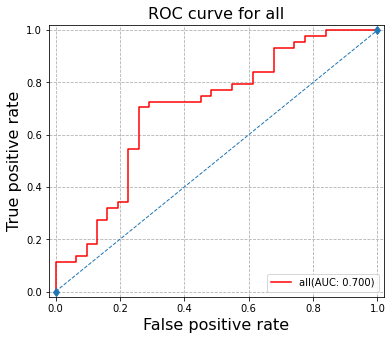

<Figure size 432x288 with 0 Axes>

In [422]:
from sklearn import metrics
#ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
#ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
ap_y_pred = model.predict([c_x_test,ap_x_test,vp_x_test])
#ap_y_pred = model.predict(ap_x_test_data)
#print(ap_y_pred)
ap_y_pred=np.argmax(ap_y_pred,axis=1)
print(ap_y_pred)
y_data_one = y_data_copy[test_index]
ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
print('acc=',ap_acc)
ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
print('precision=',ap_precision)
ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
print('recall=',ap_recall)
ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
print('f1=',ap_f1)
tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
print('auc=',auc0)
plt.figure(figsize=(6,5))
plt.margins(0.02,0.02)
plt.plot(fpr0,tpr0,'red',label="all(AUC: {:.3f})".format(auc0),linewidth=1.5)
plt.plot([0,1],[0,1],'d--',linewidth=1)
plt.xlabel("False positive rate",fontsize=16)
plt.ylabel("True positive rate",fontsize=16)
plt.title("ROC curve for all",fontsize=16)
plt.legend(loc="lower right",fontsize=10)
plt.grid(linestyle='--')
plt.show()
#save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
plt.savefig("roc_all.png",bbox_inches = 'tight',dpi=500)

In [250]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

from matplotlib import rcParams
from collections import Counter
for j in range(15):
    print('-----------------------迭代--------------------------:',j)
    kfold = StratifiedKFold(n_splits=5,random_state=50*(j+1),shuffle=True)
    for i, (train, test) in enumerate(kfold.split(lasso_ap_data, y_data)):
        print(train)
        print(len(train))
        print(test)
        print(len(test))
        '''
        from keras import losses,optimizers,metrics
        model = transformer_res_model(input_dim=(441,1),class_num=2)
        model.summary()
        #model.compile(optimizer='adam', loss=categorical_focal_loss(gamma=2, alpha=1), metrics=['accuracy'])
        model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
        '''
        input1 = Input(shape=(32,))
        input2 = Input(shape=(224,))
        input3 = Input(shape=(192,))
        model = merge_model(input1,input2,input3,2)
#         model = Sequential()
#         model = MLP(model,input_shape=(237,),num_classes=2)
        #model.compile(optimizer='adam', loss=categorical_focal_loss(gamma=1.25, alpha=0.25), metrics=['accuracy'])
        model.compile(optimizer='nadam', loss="categorical_crossentropy", metrics=["accuracy"])
        #model.summary()
        train_set_x = np.concatenate((c_values[train],lasso_ap_data[train],lasso_vp_data[train]),axis=1)
        train_set_y = y_data[train]
        train_set_x, train_set_y = SMOTE().fit_sample(train_set_x, train_set_y)
        train1 = train_set_x[:,0:32]
        train2 = train_set_x[:,32:32+224]
        train3 = train_set_x[:,32+224:32+224+192]
        train_set_y = keras.utils.to_categorical(train_set_y, 2)
        test_set_y=keras.utils.to_categorical(y_data[test], 2)
        print(train1.shape)
        print(train2.shape)
        print(train3.shape)
        print(train_set_y.shape)
        #print (sorted(Counter(x_data).items()))
        early_stopping = EarlyStopping(monitor='val_acc',patience=30) 
        '''
        model.fit(x=lasso_ap_data[train].reshape(lasso_ap_data[train].shape[0],lasso_ap_data[train].shape[1],1), y=y_data[train], epochs=1000, batch_size=20,
                  validation_data=(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1),y_data[test]),
                  verbose=0,class_weight='auto',callbacks=[early_stopping])
                  '''
        model.fit(x=[train1,train2,train3], y=train_set_y, epochs=300,
                  batch_size=30,validation_data=([c_values[test],lasso_ap_data[test],lasso_vp_data[test]],test_set_y),
                  verbose=0,class_weight='auto',callbacks=[early_stopping])
        from sklearn import metrics
        #ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
        #ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
        ap_y_pred = model.predict([c_values[test],lasso_ap_data[test],lasso_vp_data[test]])
        #ap_y_pred = model.predict(ap_x_test_data)
        #print(ap_y_pred)
        ap_y_pred=np.argmax(ap_y_pred,axis=1)
        print(ap_y_pred)
        y_data_one = y_data[test]
        ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
        print('acc=',ap_acc)
        ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
        print('precision=',ap_precision)
        ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
        print('recall=',ap_recall)
        ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
        print('f1=',ap_f1)
        tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
        print('auc=',auc0)
        plt.figure(figsize=(6,5))
        plt.margins(0.02,0.02)
        plt.plot(fpr0,tpr0,'red',label="all(AUC: {:.3f})".format(auc0),linewidth=1.5)
        plt.plot([0,1],[0,1],'d--',linewidth=1)
        plt.xlabel("False positive rate",fontsize=16)
        plt.ylabel("True positive rate",fontsize=16)
        # plt.title("ROC curve",fontsize=16)
        plt.legend(loc="lower right",fontsize=10)
        plt.grid(linestyle='--')
        plt.show()
        save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
        plt.savefig("./roc/"+save_image_name,bbox_inches = 'tight',dpi=500)
          #model.fit(x=ap_x_train_data, y=ap_y_train_data, epochs=100, batch_size=8,validation_data=(ap_x_test_data,ap_y_test_data),class_weight='auto')
#         #model.fit(x=lasso_ap_train_data.reshape(lasso_ap_train_data.shape[0],lasso_ap_train_data.shape[1],1), y=ap_y_train_data, epochs=1000, batch_size=30,validation_data=(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1),ap_y_test_data),class_weight='auto',callbacks=[early_stopping])

-----------------------迭代--------------------------: 0


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

from matplotlib import rcParams
from collections import Counter
for j in range(100):
    print('-----------------------迭代--------------------------:',j)
    kfold = StratifiedKFold(n_splits=5,random_state=24*(j+1),shuffle=True)
    for i, (train, test) in enumerate(kfold.split(lasso_ap_data, y_data.argmax(1))):
        print(train)
        print(len(train))
        print(test)
        print(len(test))
        '''
        from keras import losses,optimizers,metrics
        model = transformer_res_model(input_dim=(441,1),class_num=2)
        model.summary()
        #model.compile(optimizer='adam', loss=categorical_focal_loss(gamma=2, alpha=1), metrics=['accuracy'])
        model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
        '''
        input1 = Input(shape=(32,))
        input2 = Input(shape=(245,))
        input3 = Input(shape=(257,))
        model = merge_model(input1,input2,input3,2)
#         model = Sequential()
#         model = MLP(model,input_shape=(237,),num_classes=2)
        #model.compile(optimizer='adam', loss=categorical_focal_loss(gamma=1.25, alpha=0.25), metrics=['accuracy'])
        model.compile(optimizer='nadam', loss="categorical_crossentropy", metrics=["accuracy"])
        #model.summary()
#         train_set_x = np.concatenate((c_values[train],lasso_ap_data[train],lasso_vp_data[train]),axis=1)
#         train_set_y = y_data[train]
#         train_set_x, train_set_y = SMOTE().fit_sample(train_set_x, train_set_y)
#         train1 = train_set_x[:,0:32]
#         train2 = train_set_x[:,32:32+224]
#         train3 = train_set_x[:,32+224:32+224+192]
#         train_set_y = keras.utils.to_categorical(train_set_y, 2)
#         test_set_y=keras.utils.to_categorical(y_data[test], 2)
#         print(train1.shape)
#         print(train2.shape)
#         print(train3.shape)
#         print(train_set_y.shape)
        #print (sorted(Counter(x_data).items()))
        early_stopping = EarlyStopping(monitor='val_acc',patience=50) 
        '''
        model.fit(x=lasso_ap_data[train].reshape(lasso_ap_data[train].shape[0],lasso_ap_data[train].shape[1],1), y=y_data[train], epochs=1000, batch_size=20,
                  validation_data=(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1),y_data[test]),
                  verbose=0,class_weight='auto',callbacks=[early_stopping])
                  '''
        model.fit(x=[c_values[train],lasso_ap_data[train],lasso_vp_data[train]], y=y_data[train], epochs=300,
                  batch_size=30,validation_data=([c_values[test],lasso_ap_data[test],lasso_vp_data[test]],y_data[test]),
                  verbose=0,class_weight='auto',callbacks=[early_stopping])
        from sklearn import metrics
        #ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
        #ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
        ap_y_pred = model.predict([c_values[test],lasso_ap_data[test],lasso_vp_data[test]])
        #ap_y_pred = model.predict(ap_x_test_data)
        #print(ap_y_pred)
        ap_y_pred=np.argmax(ap_y_pred,axis=1)
        print(ap_y_pred)
        y_data_one = y_data_copy[test]
        ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
        print('acc=',ap_acc)
        ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
        print('precision=',ap_precision)
        ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
        print('recall=',ap_recall)
        ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
        print('f1=',ap_f1)
        tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
        print('auc=',auc0)
        plt.figure(figsize=(6,5))
        plt.margins(0.02,0.02)
        plt.plot(fpr0,tpr0,'red',label="all(AUC: {:.3f})".format(auc0),linewidth=1.5)
        plt.plot([0,1],[0,1],'d--',linewidth=1)
        plt.xlabel("False positive rate",fontsize=16)
        plt.ylabel("True positive rate",fontsize=16)
        # plt.title("ROC curve",fontsize=16)
        plt.legend(loc="lower right",fontsize=10)
        plt.grid(linestyle='--')
        plt.show()
        save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
        plt.savefig("./roc2/"+save_image_name,bbox_inches = 'tight',dpi=500)
          #model.fit(x=ap_x_train_data, y=ap_y_train_data, epochs=100, batch_size=8,validation_data=(ap_x_test_data,ap_y_test_data),class_weight='auto')
#         #model.fit(x=lasso_ap_train_data.reshape(lasso_ap_train_data.shape[0],lasso_ap_train_data.shape[1],1), y=ap_y_train_data, epochs=1000, batch_size=30,validation_data=(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1),ap_y_test_data),class_weight='auto',callbacks=[early_stopping])

In [ ]:
from xgboost import XGBClassifier
xb5 = XGBClassifier(
                    objective='binary:logistic'
                    ,learning_rate=0.07
                    ,n_estimators=28
                    ,max_depth=3
                    ,min_child_weight=3
                    ,gamma=4
                    ,subsample=0.3
                    ,colsample_bytree=0.8
                    ,scale_pos_weight=1.66
                    ,reg_alpha=0.0001
                    ,reg_lambda=3
                    ,n_jobs=-1
                    ,seed=2019)

xb5.fit(X_train, y_train, eval_metric='auc')
y_test_preds = xb5.predict(X_test)
y_test_predprob = xb5.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

from matplotlib import rcParams
from collections import Counter
for j in range(15):
    print('-----------------------迭代--------------------------:',j)
    kfold = StratifiedKFold(n_splits=5,random_state=50*(j+1),shuffle=True)
    for i, (train, test) in enumerate(kfold.split(lasso_ap_data, y_data)):
        print(train)
        print(len(train))
        print(test)
        print(len(test))
        '''
        from keras import losses,optimizers,metrics
        model = transformer_res_model(input_dim=(441,1),class_num=2)
        model.summary()
        #model.compile(optimizer='adam', loss=categorical_focal_loss(gamma=2, alpha=1), metrics=['accuracy'])
        model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
        '''
        input1 = Input(shape=(32,))
        input2 = Input(shape=(224,))
        input3 = Input(shape=(192,))
        model = merge_model(input1,input2,input3,2)
#         model = Sequential()
#         model = MLP(model,input_shape=(237,),num_classes=2)
        #model.compile(optimizer='adam', loss=categorical_focal_loss(gamma=1.25, alpha=0.25), metrics=['accuracy'])
        model.compile(optimizer='nadam', loss="categorical_crossentropy", metrics=["accuracy"])
        #model.summary()
        train_set_x = np.concatenate((c_values[train],lasso_ap_data[train],lasso_vp_data[train]),axis=1)
        train_set_y = y_data[train]
        train_set_x, train_set_y = SMOTE().fit_sample(train_set_x, train_set_y)
        train1 = train_set_x[:,0:32]
        train2 = train_set_x[:,32:32+224]
        train3 = train_set_x[:,32+224:32+224+192]
        train_set_y = keras.utils.to_categorical(train_set_y, 2)
        test_set_y=keras.utils.to_categorical(y_data[test], 2)
        print(train1.shape)
        print(train2.shape)
        print(train3.shape)
        print(train_set_y.shape)
        #print (sorted(Counter(x_data).items()))
        early_stopping = EarlyStopping(monitor='val_acc',patience=30) 
        '''
        model.fit(x=lasso_ap_data[train].reshape(lasso_ap_data[train].shape[0],lasso_ap_data[train].shape[1],1), y=y_data[train], epochs=1000, batch_size=20,
                  validation_data=(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1),y_data[test]),
                  verbose=0,class_weight='auto',callbacks=[early_stopping])
                  '''
        model.fit(x=[train1,train2,train3], y=train_set_y, epochs=300,
                  batch_size=30,validation_data=([c_values[test],lasso_ap_data[test],lasso_vp_data[test]],test_set_y),
                  verbose=0,class_weight='auto',callbacks=[early_stopping])
        from sklearn import metrics
        #ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
        #ap_y_pred = model.predict(lasso_ap_data[test].reshape(lasso_ap_data[test].shape[0],lasso_ap_data[test].shape[1],1))
        ap_y_pred = model.predict([c_values[test],lasso_ap_data[test],lasso_vp_data[test]])
        #ap_y_pred = model.predict(ap_x_test_data)
        #print(ap_y_pred)
        ap_y_pred=np.argmax(ap_y_pred,axis=1)
        print(ap_y_pred)
        y_data_one = y_data[test]
        ap_acc = metrics.accuracy_score(y_data_one, ap_y_pred)
        print('acc=',ap_acc)
        ap_precision = metrics.precision_score(y_data_one, ap_y_pred)
        print('precision=',ap_precision)
        ap_recall = metrics.recall_score(y_data_one, ap_y_pred)
        print('recall=',ap_recall)
        ap_f1 = metrics.f1_score(y_data_one, ap_y_pred)
        print('f1=',ap_f1)
        tpr0,fpr0,auc0 = get_roc(y_data_one,ap_y_pred)
        print('auc=',auc0)
        plt.figure(figsize=(6,5))
        plt.margins(0.02,0.02)
        plt.plot(fpr0,tpr0,'red',label="all(AUC: {:.3f})".format(auc0),linewidth=1.5)
        plt.plot([0,1],[0,1],'d--',linewidth=1)
        plt.xlabel("False positive rate",fontsize=16)
        plt.ylabel("True positive rate",fontsize=16)
        # plt.title("ROC curve",fontsize=16)
        plt.legend(loc="lower right",fontsize=10)
        plt.grid(linestyle='--')
        plt.show()
        save_image_name = 'ROC'+str(j)+'_'+str(i)+'.png'
        plt.savefig("./roc/"+save_image_name,bbox_inches = 'tight',dpi=500)


In [ ]:
'''
[  0   1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18
  19  20  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38
  39  40  41  42  43  45  46  48  49  50  51  53  54  55  56  57  58  59
  61  62  63  65  66  67  69  70  71  72  73  74  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 124 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 151 152 153 154 156 157 158 159
 160 161 162 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 189 190 191 192 193 196 197 198 199
 200 202 203 205 206 207 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 280 281 282 283 284 285 288 290 292 293 295 296]
[ 12  21  34  44  47  52  60  64  68  75 103 123 125 149 150 155 163 188
 194 195 201 204 208 251 279 286 287 289 291 294]

a = [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  36  37  38
  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  59
  60  61  62  63  66  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  86  87  88  90  91  93  94  95  96  97  98 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 121 122 123 124
 125 126 127 128 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 166 167 168 169 170 171 172 173 174 175 176 177 178 179 181 182
 183 184 186 187 188 189 191 192 193 194 195 196 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 260
 261 262 263 264 265 266 267 268 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 295]

[  0  32  35  43  57  58  64  65  67  84  85  89  92  99 118 119 120 129
 130 165 180 185 190 197 216 233 259 269 294 296]
 '''
'''
[  0   1   3   4   6   7   9  10  11  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  28  30  33  34  35  36  37  38  39  40  41  45  46
  48  49  50  51  52  53  54  55  56  57  58  59  60  63  70  73  75  76
  77  78  80  81  82  83  84  86  87  88  90  92  93  94  95  96  97  98
 100 101 102 103 104 105 106 107 109 110 112 113 114 115 116 118 119 121
 122 123 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 154 155 156 157 158 160
 163 164 165 166 167 169 170 171 174 175 176 177 178 179 180 181 182 183
 184 185 186 189 190 191 192 193 194 195 196 197 198 199 201 202 203 205
 207 208 209 210 211 212 214 215 216 217 218 219 221 222 223 224 226 228
 229 230 233 235 237 238 239 240 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 290 291
 292 293 294 296]
238
[  2   5   8  12  27  29  31  32  42  43  44  47  61  62  64  65  66  67
  68  69  71  72  74  79  85  89  91  99 108 111 117 120 124 153 159 161
 162 168 172 173 187 188 200 204 206 213 220 225 227 231 232 234 236 241
 242 243 261 289 295]
ap_acc= 0.711864406779661
ap_precision= 0.6086956521739131
ap_recall= 0.6363636363636364
ap_f1= 0.6222222222222223
'''
'''
[  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  19  20  21
  22  23  24  25  26  27  28  29  30  32  33  34  37  38  39  40  41  42
  43  44  46  47  48  49  50  51  52  53  54  55  56  59  61  62  63  64
  65  66  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  86  87  88  90  91  92  93  94  95  96  98  99 100 102 103 104 105 107
 108 109 111 112 114 115 117 118 119 120 121 123 125 126 127 128 130 131
 132 133 134 135 136 138 139 140 142 144 145 146 148 149 150 151 152 153
 154 155 157 158 159 160 161 162 163 164 165 166 170 171 172 173 174 175
 176 178 181 182 183 184 185 186 187 188 189 190 191 193 195 196 197 198
 199 200 201 203 205 207 208 209 210 211 212 214 215 216 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 245 246 247 248 249 253 254 255 256 257 258 260 262 263 266
 267 270 271 272 273 274 275 276 277 278 280 282 284 285 286 287 288 289
 290 291 292 293 295 296 297 298 299 300 301 302 303 304 305 306 307 308
 310 311 312 314 315 318 319 320 321 322 323 324 325 326 328 329 330 332
 333 334 335 336 338 340 341 344 345 346 347 348 349 351 352 353 356 358
 360 361 362 364 365 367 368 370 371 372 373 374]
300
[  7  16  17  18  31  35  36  45  57  58  60  67  69  85  89  97 101 106
 110 113 116 122 124 129 137 141 143 147 156 167 168 169 177 179 180 192
 194 202 204 206 213 217 218 244 250 251 252 259 261 264 265 268 269 279
 281 283 294 309 313 316 317 327 331 337 339 342 343 350 354 355 357 359
 363 366 369 375]
76

acc= 0.7763157894736842
precision= 0.7333333333333333
recall= 0.868421052631579
f1= 0.7951807228915663
auc= 0.8186379928315414
'''
'''
[  0   1   2   5   6   7   8   9  10  11  12  13  15  16  17  18  19  20
  21  22  23  25  26  28  29  30  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  48  49  50  51  52  53  54  55  56  57  59  61  62
  64  65  66  68  69  70  71  73  75  76  77  78  79  80  81  82  83  84
  85  88  89  91  92  93  94  95  96  97  98  99 100 101 103 104 105 106
 107 108 111 112 113 114 116 118 119 120 121 122 123 124 125 126 127 129
 131 132 133 134 136 138 139 140 141 145 146 147 148 149 150 151 152 153
 154 155 157 158 159 160 161 162 163 164 166 167 168 170 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 187 189 190 191 192 193 194 196
 199 200 203 204 206 207 208 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 237 238 239 240 242 243
 244 245 246 247 248 249 250 254 255 256 257 258 260 261 262 263 264 265
 267 268 269 270 271 272 273 274 275 276 277 279 280 281 282 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 303 304 305
 306 307 308 309 310 311 312 315 317 318 320 323 325 326 327 328 329 330
 331 333 334 335 336 337 338 339 340 341 342 343 344 345 346 349 351 354
 356 359 360 361 362 364 365 368 369 370 371 373 374]
301
[  3   4  14  24  27  31  47  58  60  63  67  72  74  86  87  90 102 109
 110 115 117 128 130 135 137 142 143 144 156 165 169 171 186 188 195 197
 198 201 202 205 209 210 211 235 236 241 251 252 253 259 266 278 283 302
 313 314 316 319 321 322 324 332 347 348 350 352 353 355 357 358 363 366
 367 372 375]
 '''

# train model

In [ ]:
from keras import backend as K
import tensorflow as tf
def categorical_focal_loss(gamma=2., alpha=.25):
    """
    Softmax version of focal loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """

        # Scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)

        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(K.sum(loss, axis=-1))

    return categorical_focal_loss_fixed

In [ ]:
model = Sequential()
model = MLP(model,input_shape=(239,),num_classes=2)
#model.compile(optimizer='adam', loss=categorical_focal_loss(gamma=1.25, alpha=0.25), metrics=['accuracy'])
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
model = Sequential()
model = conv(model,input_shape=(1688,1),num_classes=2)
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=50)
#model.fit(x=ap_x_train_data.reshape(ap_x_train_data.shape[0],ap_x_train_data.shape[1],1), y=ap_y_train_data, epochs=100, batch_size=8,validation_data=(ap_x_test_data.reshape(ap_x_test_data.shape[0],ap_x_test_data.shape[1],1),ap_y_test_data),class_weight='auto')
model.fit(x=lasso_ap_train_data, y=ap_y_train_data, epochs=1000, batch_size=30,validation_data=(lasso_ap_test_data,ap_y_test_data),class_weight='auto',callbacks=[early_stopping])
#model.fit(x=ap_x_train_data, y=ap_y_train_data, epochs=100, batch_size=8,validation_data=(ap_x_test_data,ap_y_test_data),class_weight='auto')
#model.fit(x=lasso_ap_train_data.reshape(lasso_ap_train_data.shape[0],lasso_ap_train_data.shape[1],1), y=ap_y_train_data, epochs=1000, batch_size=30,validation_data=(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1),ap_y_test_data),class_weight='auto',callbacks=[early_stopping])

In [ ]:
model.save_weights('ap_transformer.h5')

## evaluate

### train set

In [ ]:
#ap_y_pred_train = model.predict(lasso_ap_train_data.reshape(lasso_ap_train_data.shape[0],lasso_ap_train_data.shape[1],1))
#ap_y_pred_train = model.predict(ap_x_train_data.reshape(ap_x_train_data.shape[0],ap_x_train_data.shape[1],1))
ap_y_pred_train = model.predict(lasso_ap_train_data)
#ap_y_pred_train = model.predict(ap_x_train_data.reshape(ap_x_train_data.shape[0],ap_x_train_data.shape[1],1))
print(ap_y_pred_train)
ap_y_pred_train=np.argmax(ap_y_pred_train,axis=1)
#for i in range(len(ap_y_pred_train)):
#    if ap_y_pred_train[i]>=0.5:
#            ap_y_pred_train[i]=1
#    else:
#        ap_y_pred_train[i]=0

print(ap_y_pred_train)

In [ ]:
from sklearn import metrics
ap_y_train_data = ap_train_data['label']
ap_acc_train = metrics.accuracy_score(ap_y_train_data, ap_y_pred_train)
print('ap_acc_train=',ap_acc_train)
ap_precision_train = metrics.precision_score(ap_y_train_data, ap_y_pred_train)
print('ap_precision_train=',ap_precision_train)
ap_recall_train = metrics.recall_score(ap_y_train_data, ap_y_pred_train)
print('ap_recall_train=',ap_recall_train)
ap_f1_train = metrics.f1_score(ap_y_train_data, ap_y_pred_train)
print('ap_f1_train=',ap_f1_train)

### test set

In [ ]:
from sklearn import metrics
#ap_y_pred = model.predict(lasso_ap_test_data.reshape(lasso_ap_test_data.shape[0],lasso_ap_test_data.shape[1],1))
#ap_y_pred = model.predict(ap_x_test_data.reshape(ap_x_test_data.shape[0],ap_x_test_data.shape[1],1))
ap_y_pred = model.predict(lasso_ap_test_data)
#ap_y_pred = model.predict(ap_x_test_data)
print(ap_y_pred)
ap_y_pred=np.argmax(ap_y_pred,axis=1)
print(ap_y_pred)

In [ ]:
ap_y_test_data = ap_test_data['label']
ap_acc = metrics.accuracy_score(ap_y_test_data, ap_y_pred)
print('ap_acc=',ap_acc)
ap_precision = metrics.precision_score(ap_y_test_data, ap_y_pred)
print('ap_precision=',ap_precision)
ap_recall = metrics.recall_score(ap_y_test_data, ap_y_pred)
print('ap_recall=',ap_recall)
ap_f1 = metrics.f1_score(ap_y_test_data, ap_y_pred)
print('ap_f1=',ap_f1)